In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid")

# Load Dataset
df = pd.read_csv("/kaggle/input/india-macro-data-2004-2024/Macro data india.csv")

# Display First 5 Rows
df.head()

Quarter      CPI          GDP            M3   XI RATIO         ER      PROD  \
0  2004Q2  42.12162  11733592.0  2.063160e+13  76.553589  44.836027  5.204279   
1  2004Q3  43.17189  11859354.0  2.089590e+13  74.651514  46.096182  4.080481   
2  2004Q4  43.44828  13303368.0  2.144720e+13  75.557497  44.891577  2.918514   
3  2005Q1  43.55884  13824459.0  2.245680e+13  73.108394  43.637786  2.127774   
4  2005Q2  43.80759  12815882.0  2.346590e+13  66.383215  43.585622  2.131385   

   INT         SP       WUI          GFCF         EP         WP  CAB  \
0  6.0  -8.878934  0.108003  3.478070e+12  49.888458  56.899018  0.0   
1  6.0  -1.929750  0.059517  3.608380e+12  51.380608  58.580456  0.0   
2  6.0  16.168671  0.052526  3.705740e+12  51.108455  58.943729  0.0   
3  6.0   8.337857  0.000000  3.849070e+12  52.028144  58.829558  0.0   
4  6.0   1.235799  0.167224  4.027890e+12  53.714826  59.621207  0.0   

       REIR          WGDP  REPO    UR  
0  85.97965  4.415110e+13   6.0  7.63  
1  84.14355  4.415110e+13   6.0  7.63  
2  84.50915  4.415110e+13   6.0  7.63  
3  86.69664  4.415110e+13   6.3  7.55  
4  87.52644  4.781170e+13   6.3  7.55

Quarter      CPI          GDP            M3   XI RATIO         ER      PROD  \
0  2004Q2  42.12162  11733592.0  2.063160e+13  76.553589  44.836027  5.204279   
1  2004Q3  43.17189  11859354.0  2.089590e+13  74.651514  46.096182  4.080481   
2  2004Q4  43.44828  13303368.0  2.144720e+13  75.557497  44.891577  2.918514   
3  2005Q1  43.55884  13824459.0  2.245680e+13  73.108394  43.637786  2.127774   
4  2005Q2  43.80759  12815882.0  2.346590e+13  66.383215  43.585622  2.131385   

   INT         SP       WUI          GFCF         EP         WP  CAB  \
0  6.0  -8.878934  0.108003  3.478070e+12  49.888458  56.899018  0.0   
1  6.0  -1.929750  0.059517  3.608380e+12  51.380608  58.580456  0.0   
2  6.0  16.168671  0.052526  3.705740e+12  51.108455  58.943729  0.0   
3  6.0   8.337857  0.000000  3.849070e+12  52.028144  58.829558  0.0   
4  6.0   1.235799  0.167224  4.027890e+12  53.714826  59.621207  0.0   

       REIR          WGDP  REPO    UR  
0  85.97965  4.415110e+13   6.0  7.63  
1  84.14355  4.415110e+13   6.0  7.63  
2  84.50915  4.415110e+13   6.0  7.63  
3  86.69664  4.415110e+13   6.3  7.55  
4  87.52644  4.781170e+13   6.3  7.55

In [46]:
df = df.dropna(how='all')

print("\nData Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


print("\nMissing Values (Initial):")
print(df.isnull().sum())




Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 0 to 82
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   83 non-null     object 
 1   CPI       83 non-null     float64
 2   GDP       83 non-null     float64
 3   M3        78 non-null     float64
 4   XI RATIO  83 non-null     float64
 5   ER        83 non-null     float64
 6   PROD      83 non-null     float64
 7   INT       83 non-null     float64
 8   SP        83 non-null     float64
 9   WUI       83 non-null     float64
 10  GFCF      78 non-null     float64
 11  EP        78 non-null     float64
 12  WP        75 non-null     float64
 13  CAB       83 non-null     float64
 14  REIR      83 non-null     float64
 15  WGDP      83 non-null     float64
 16  REPO      83 non-null     float64
 17  UR        83 non-null     float64
dtypes: float64(17), object(1)
memory usage: 12.3+ KB
None

Summary Statistics:
             CPI            GD

In [47]:

ffill_cols = ['M3', 'GFCF', 'WP']

# Columns to interpolate linearly
interpolate_cols = ['EP']

# Apply forward fill
df[ffill_cols] = df[ffill_cols].fillna(method='ffill')

# Apply linear interpolation
df[interpolate_cols] = df[interpolate_cols].interpolate(method='linear')

# Final check — are all missing values filled?
print("Remaining Missing Values After Filling:\n")
print(df.isnull().sum())

Remaining Missing Values After Filling:

Quarter     0
CPI         0
GDP         0
M3          0
XI RATIO    0
ER          0
PROD        0
INT         0
SP          0
WUI         0
GFCF        0
EP          0
WP          0
CAB         0
REIR        0
WGDP        0
REPO        0
UR          0
dtype: int64


/tmp/ipykernel_35/1373187293.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[ffill_cols] = df[ffill_cols].fillna(method='ffill')


In [48]:
print("\nCleaned Dataset Overview:")
print(df.describe())


Cleaned Dataset Overview:
             CPI            GDP            M3   XI RATIO         ER  \
count   83.000000  8.300000e+01  8.300000e+01  83.000000  83.000000   
mean    93.966152  2.720491e+07  1.101759e+14  67.024245  60.238679   
std     35.855340  9.964230e+06  6.799044e+13   5.497420  13.910125   
min     42.121620  1.173359e+07  2.063160e+13  55.439809  39.480844   
25%     59.866115  1.825142e+07  5.039585e+13  63.243808  45.826509   
50%     96.652850  2.598898e+07  9.926800e+13  65.920373  61.993019   
75%    123.940100  3.533002e+07  1.590730e+14  70.600629  71.647993   
max    158.910500  4.782032e+07  2.335750e+14  83.551477  84.460133   

            PROD        INT         SP        WUI          GFCF          EP  \
count  83.000000  83.000000  83.000000  83.000000  8.300000e+01   83.000000   
mean    1.540752   6.520482   3.641295   0.108799  8.799336e+12   96.164089   
std     7.772256   1.336185   9.430644   0.102805  3.273212e+12   33.201231   
min   -35.223366 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


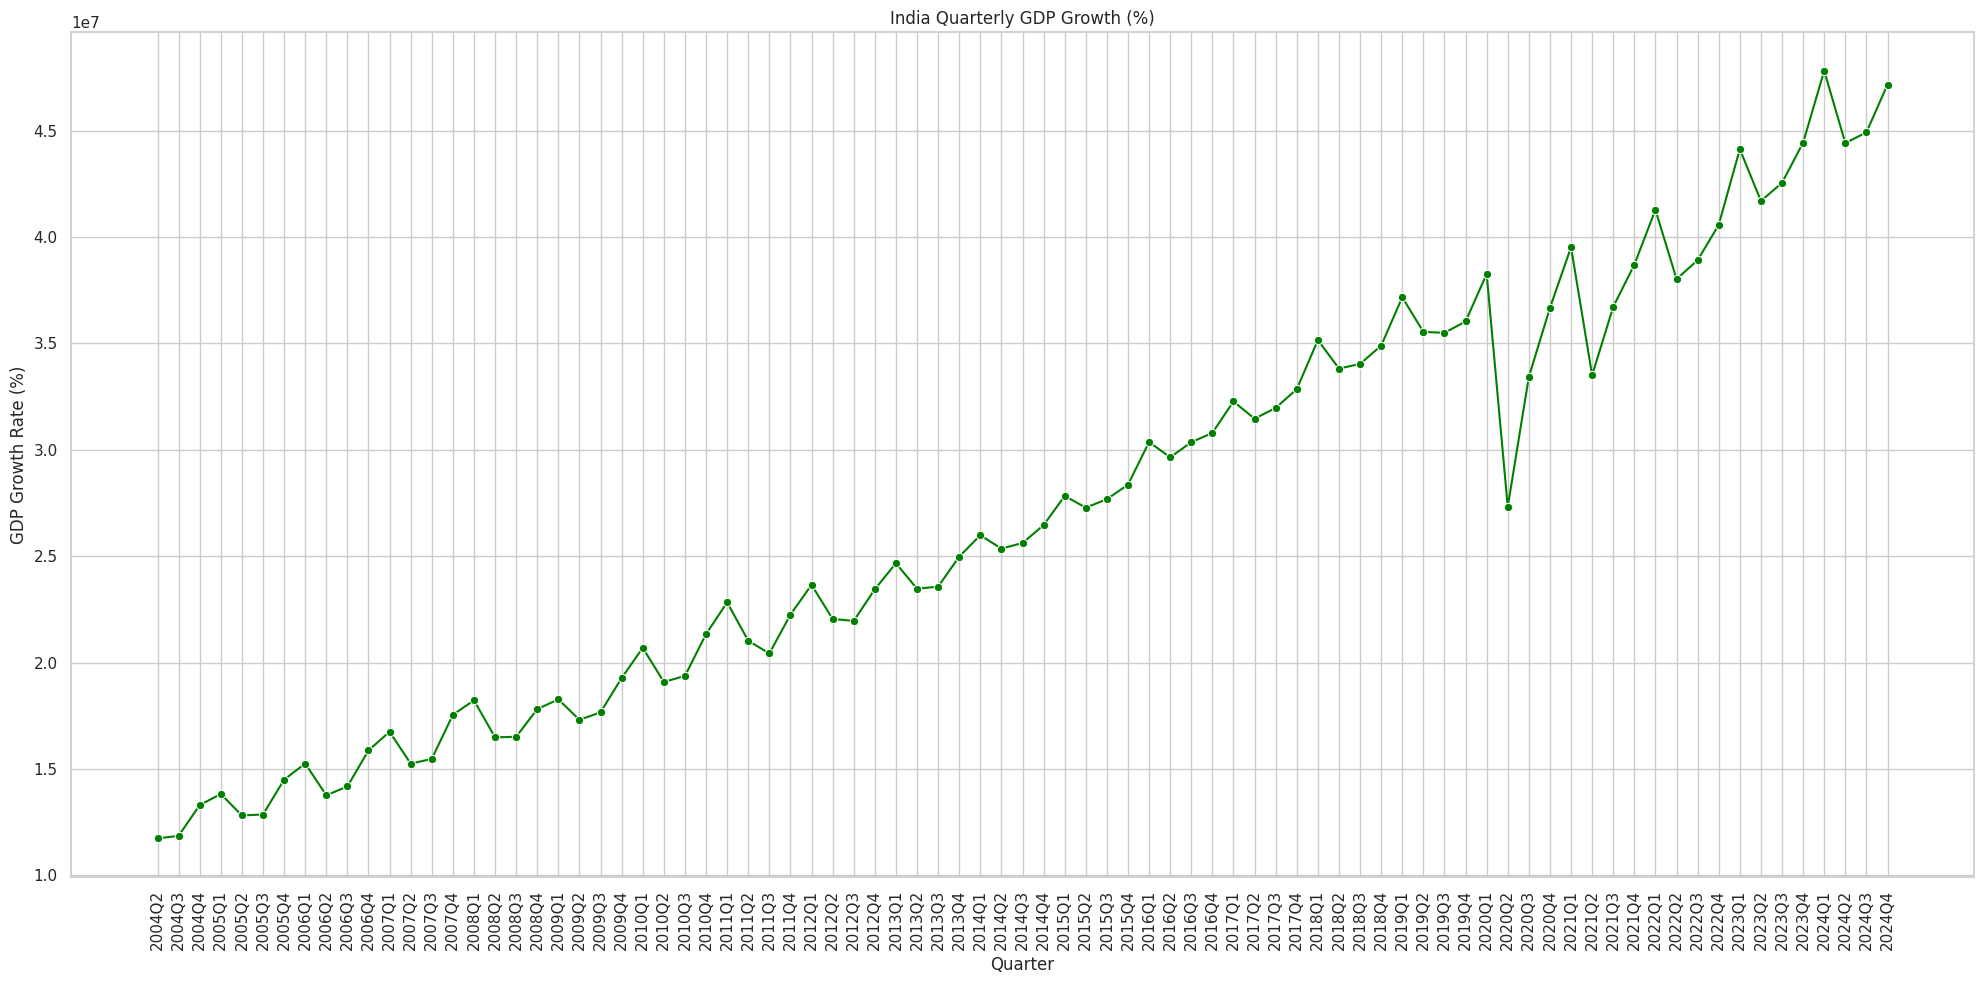

In [49]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Quarter', y='GDP', data=df, marker='o', color='green')
plt.title('India Quarterly GDP Growth (%)')
plt.xlabel('Quarter')
plt.ylabel('GDP Growth Rate (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

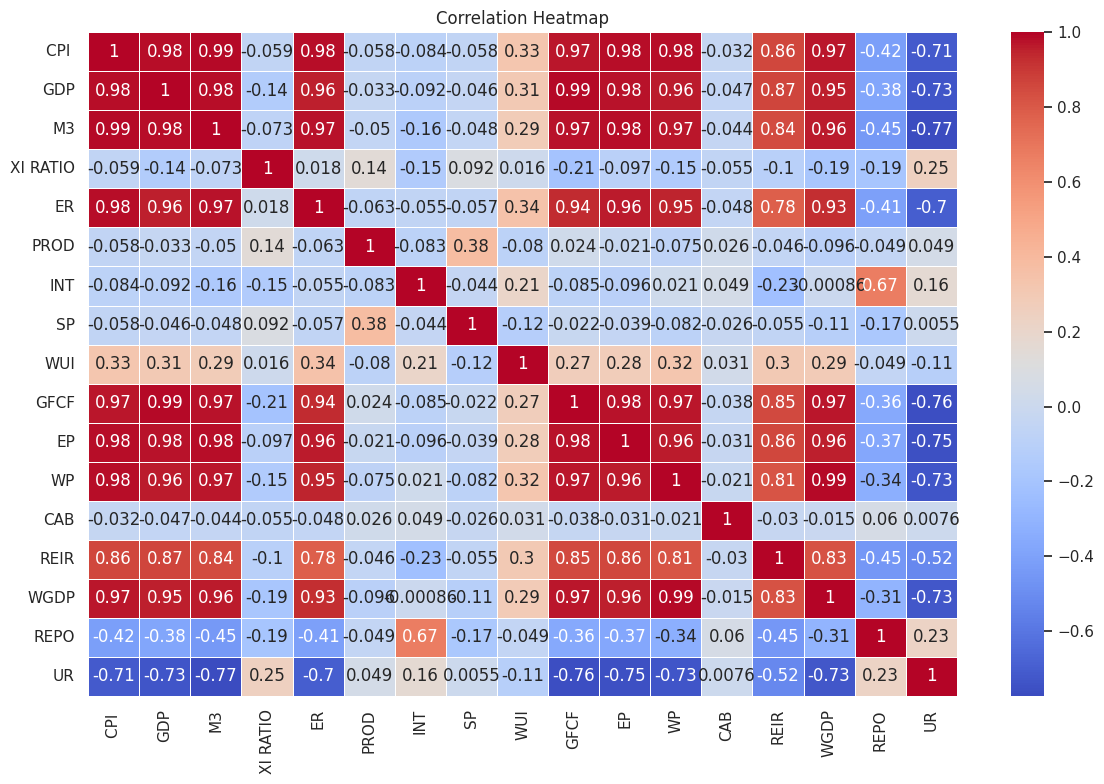

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=['Quarter']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [51]:
print(df.columns.tolist())

['Quarter', 'CPI ', 'GDP', 'M3', 'XI RATIO', 'ER', 'PROD', 'INT', 'SP', 'WUI', 'GFCF', 'EP', 'WP', 'CAB', 'REIR', 'WGDP', 'REPO', 'UR']


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


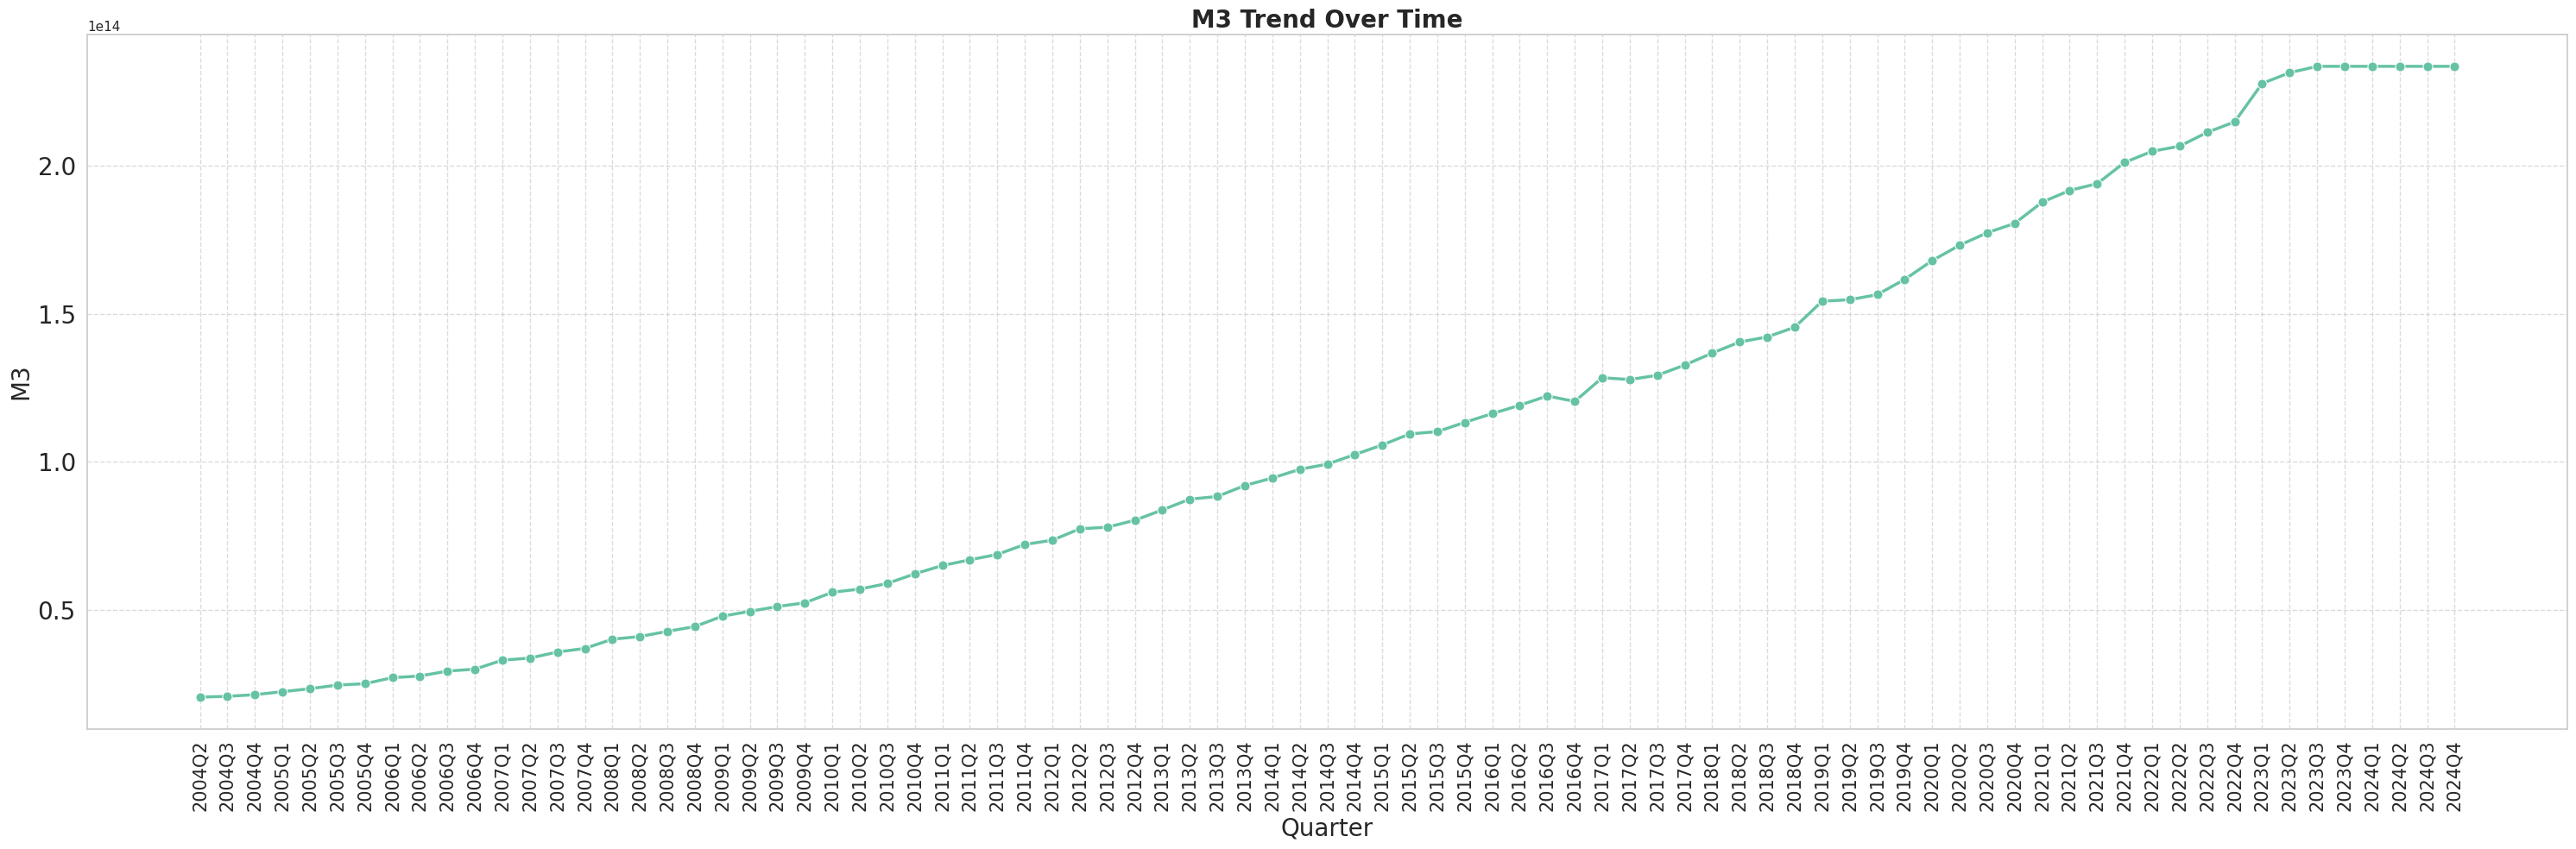

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


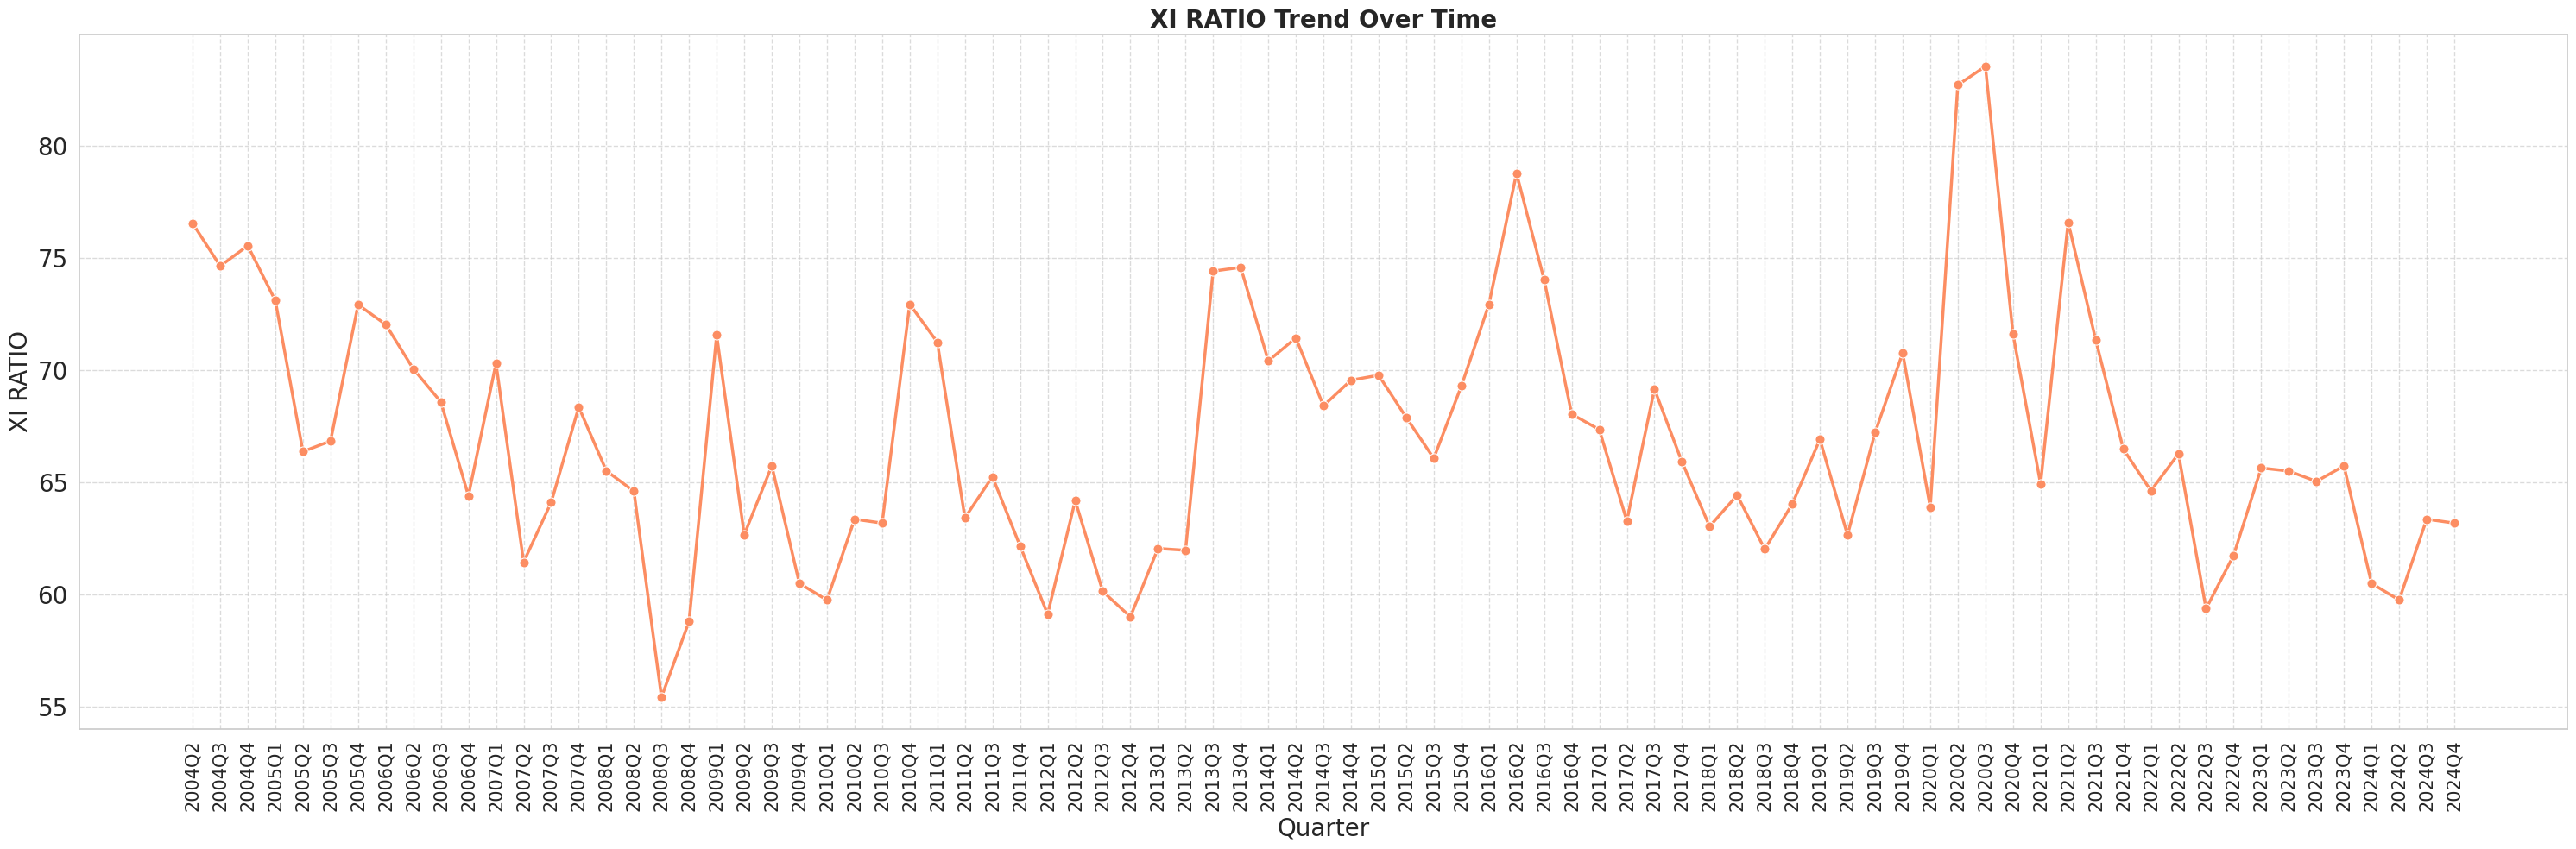

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


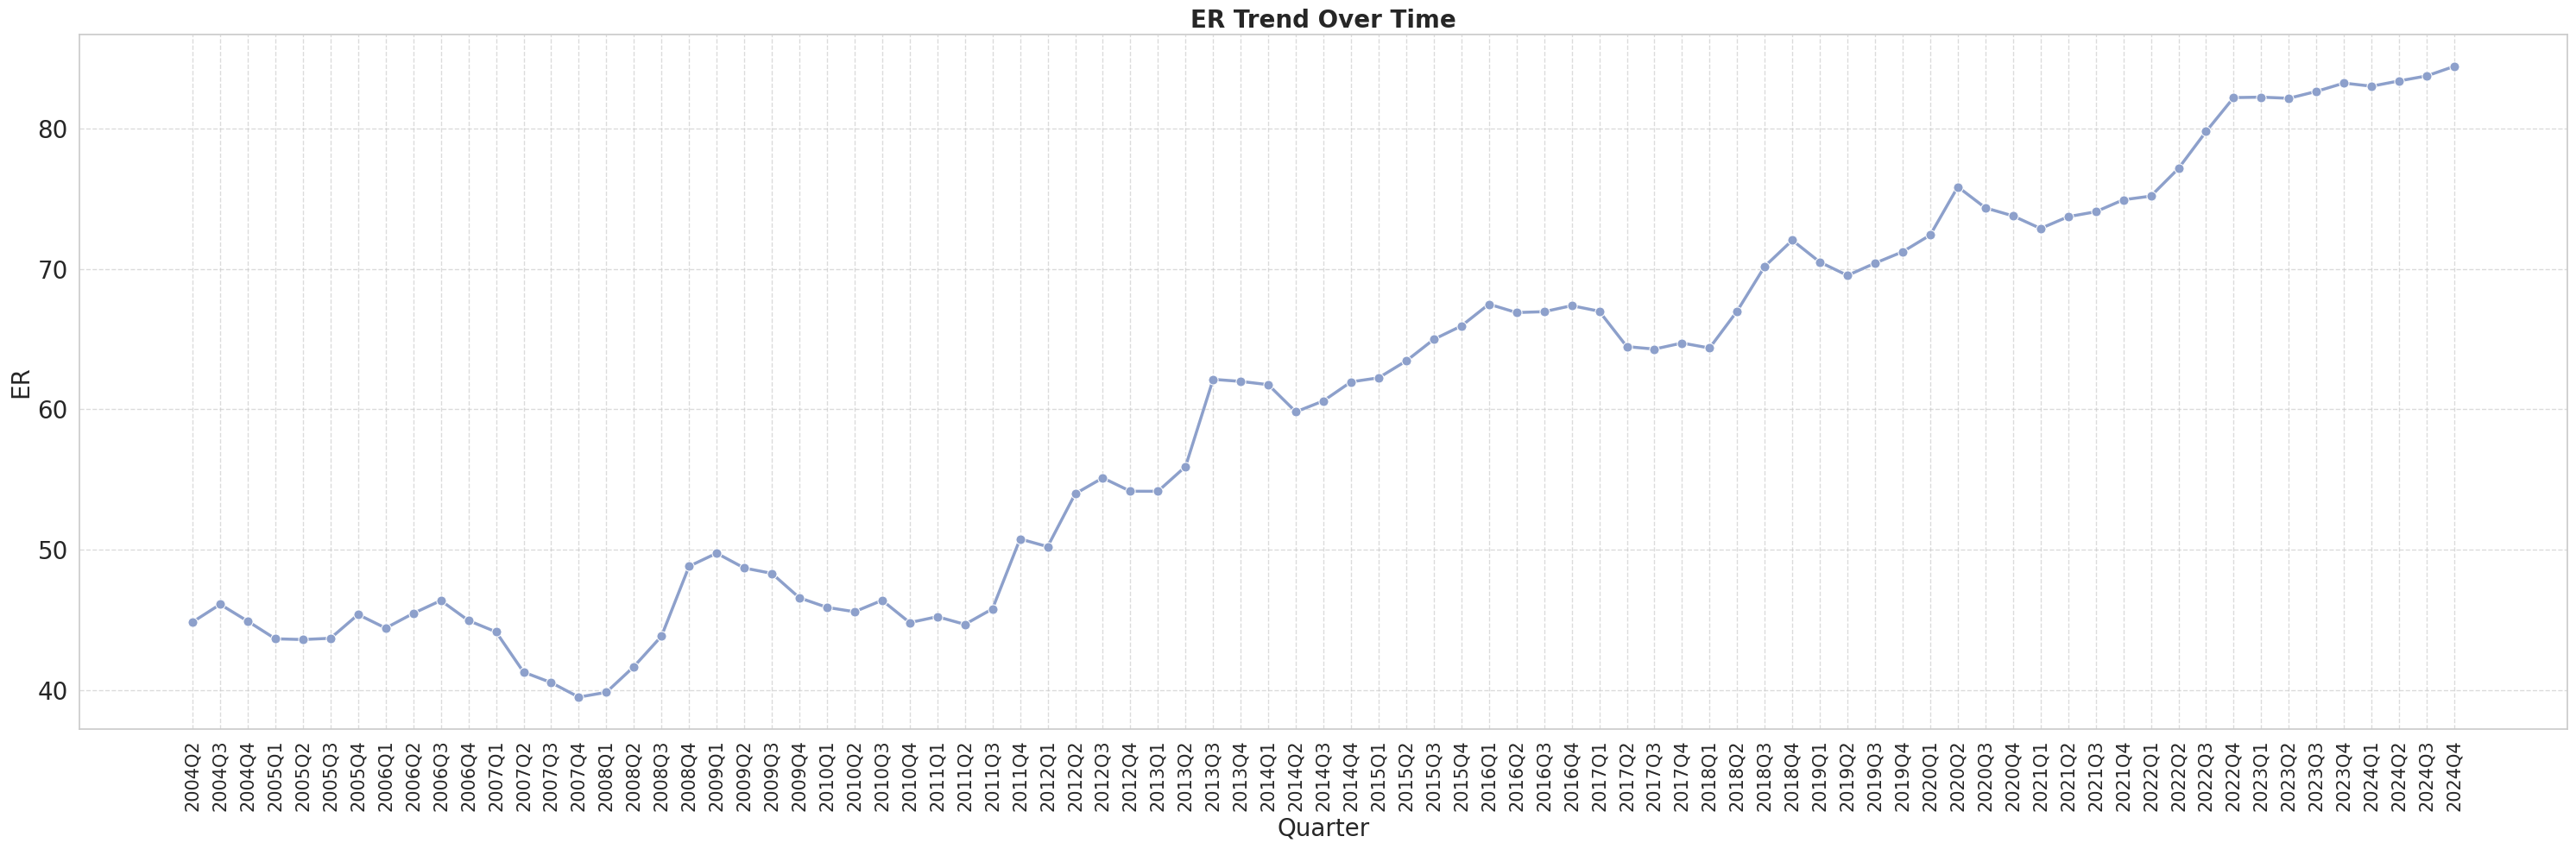

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


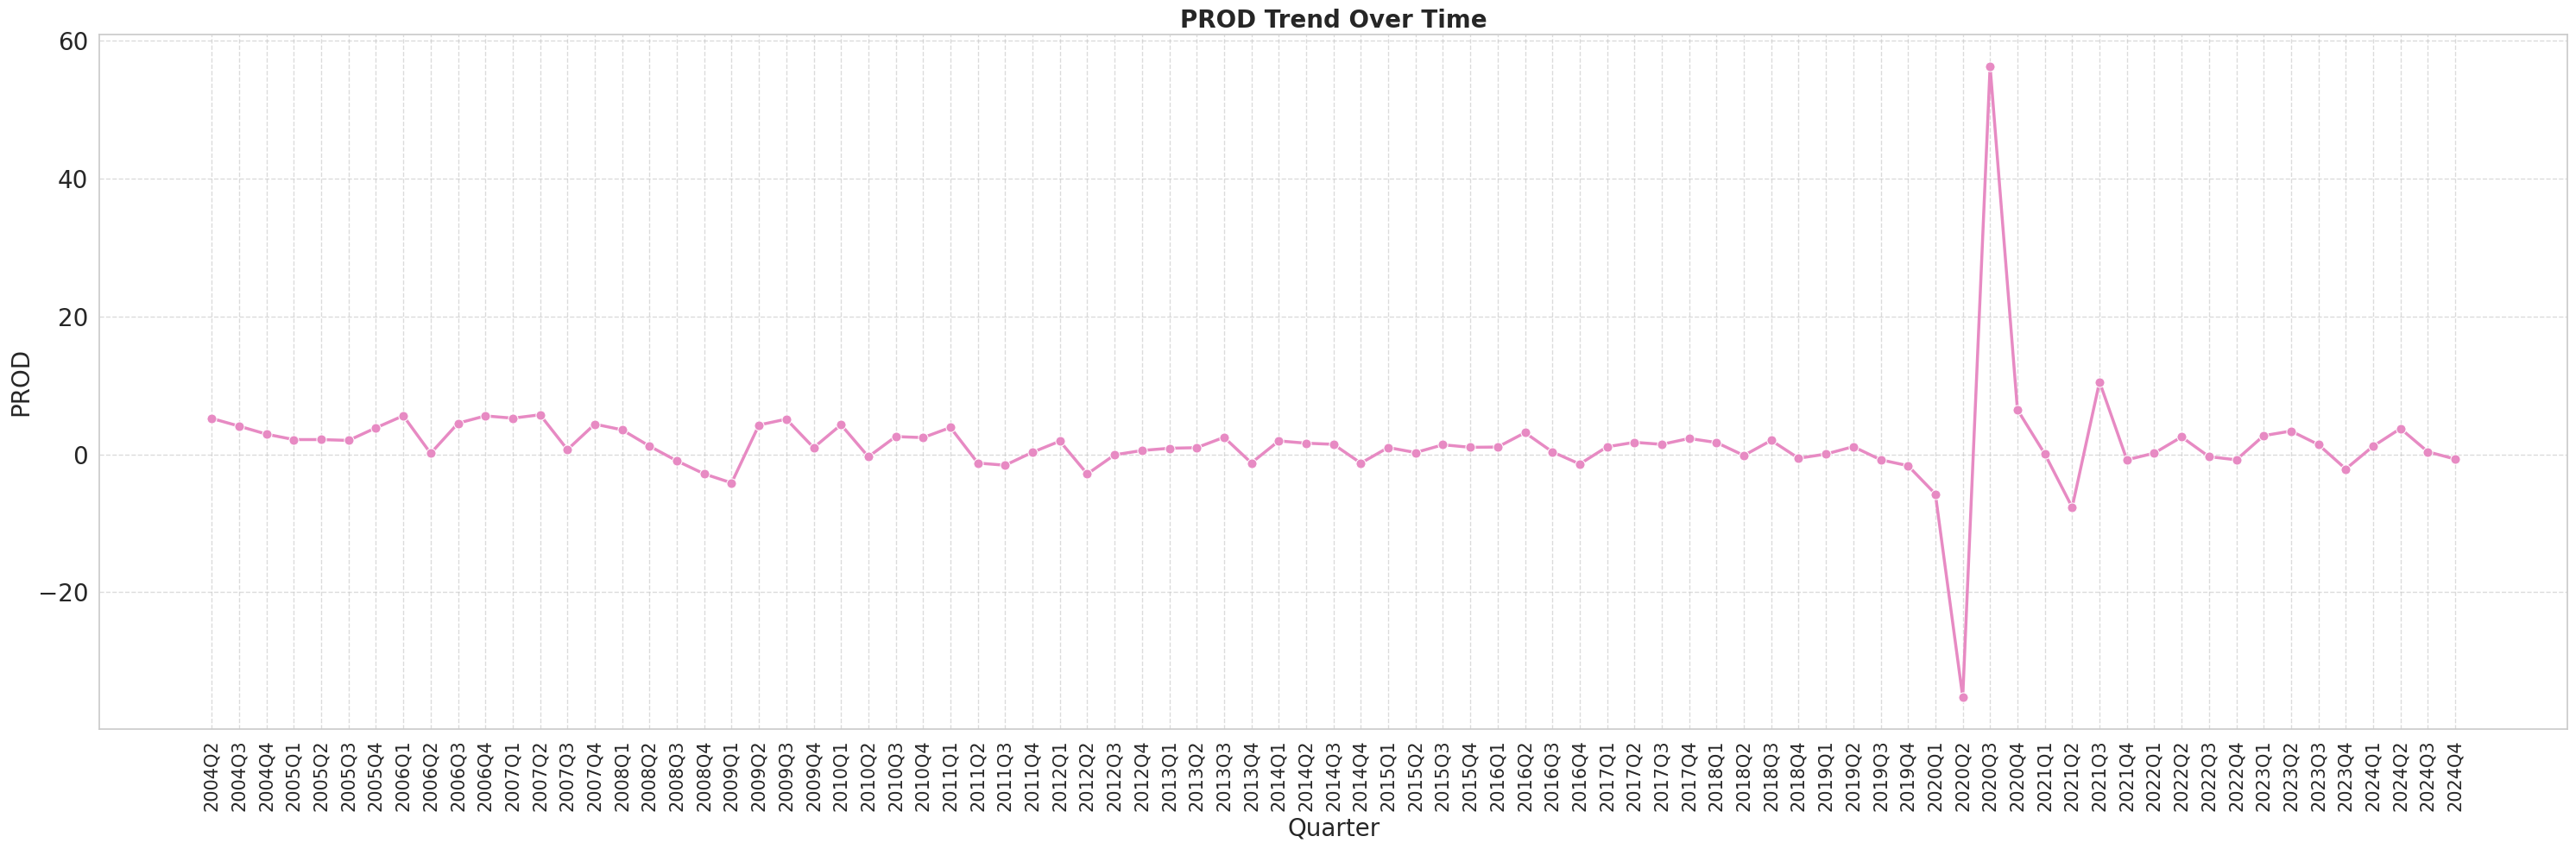

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


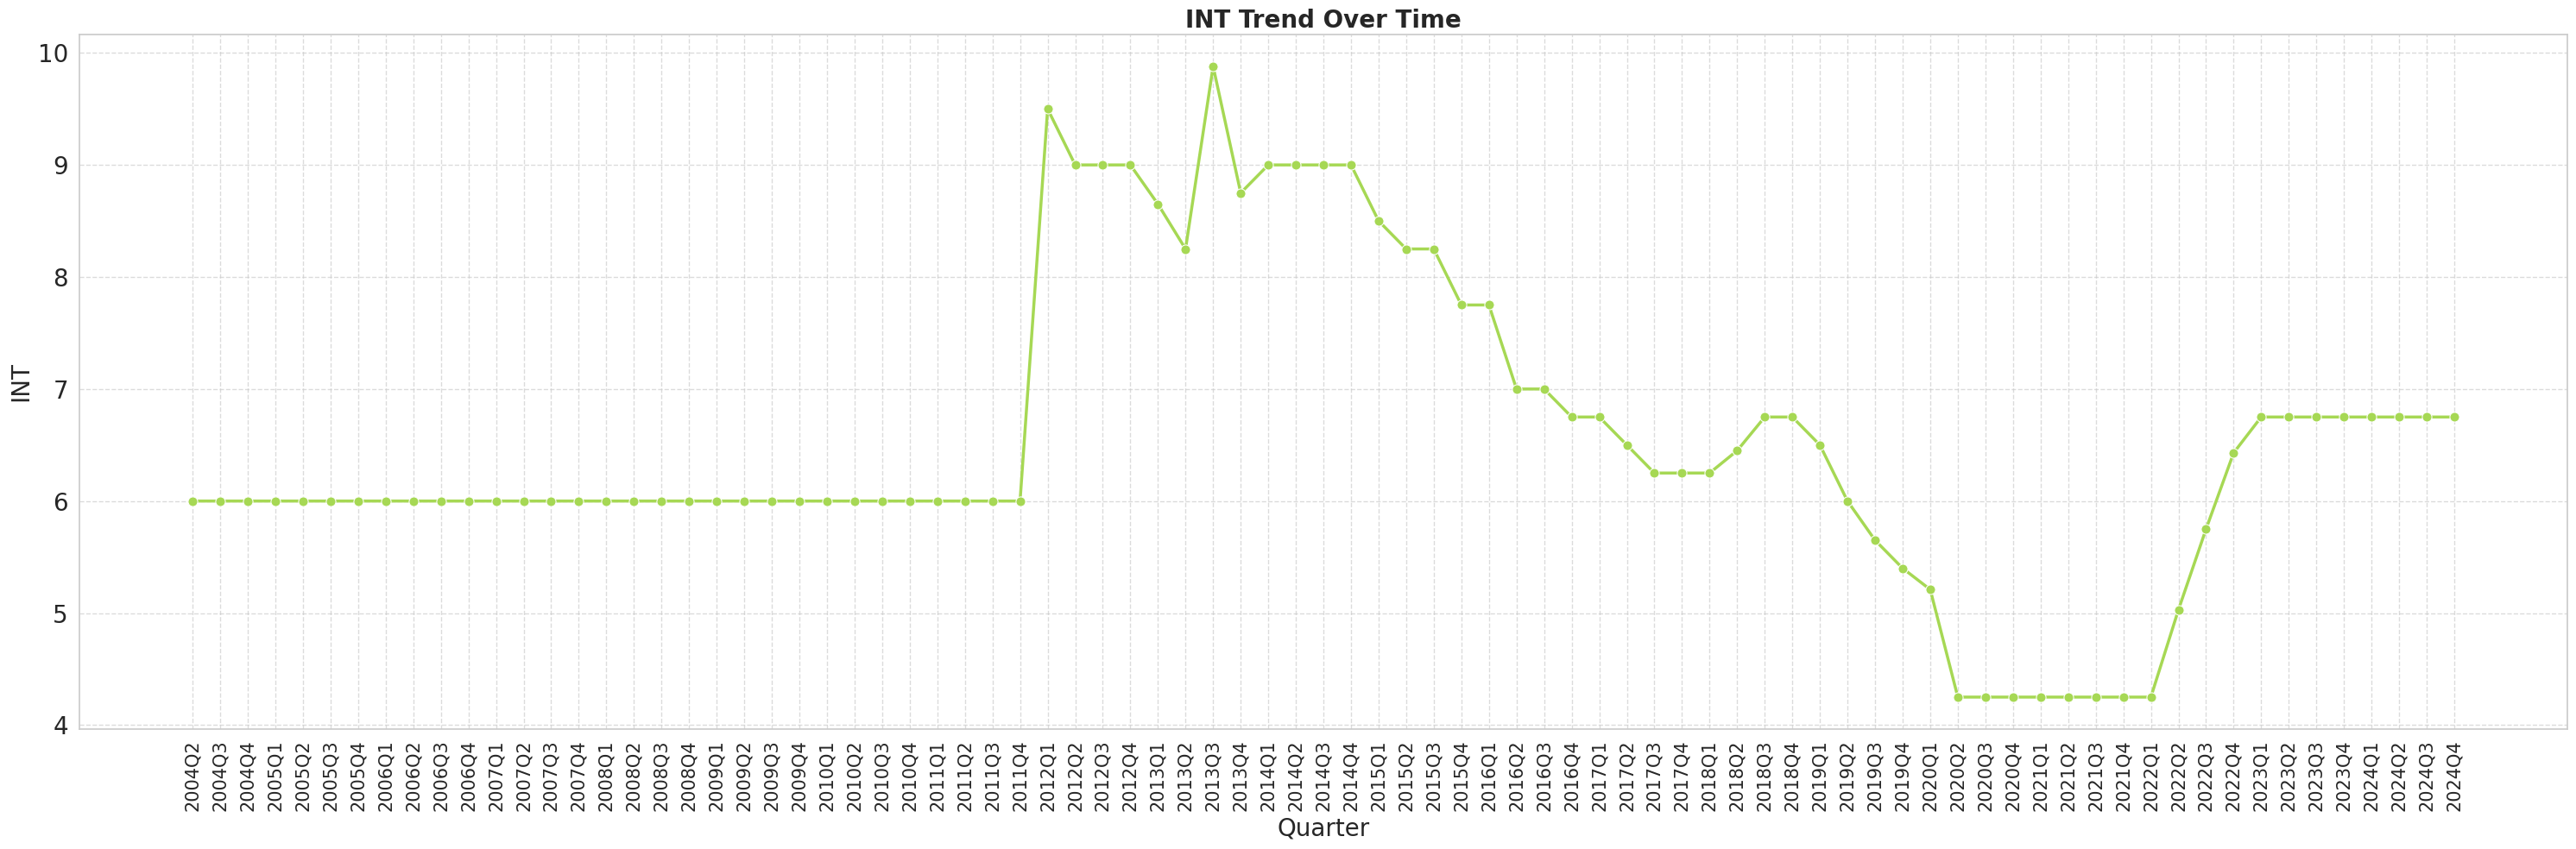

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


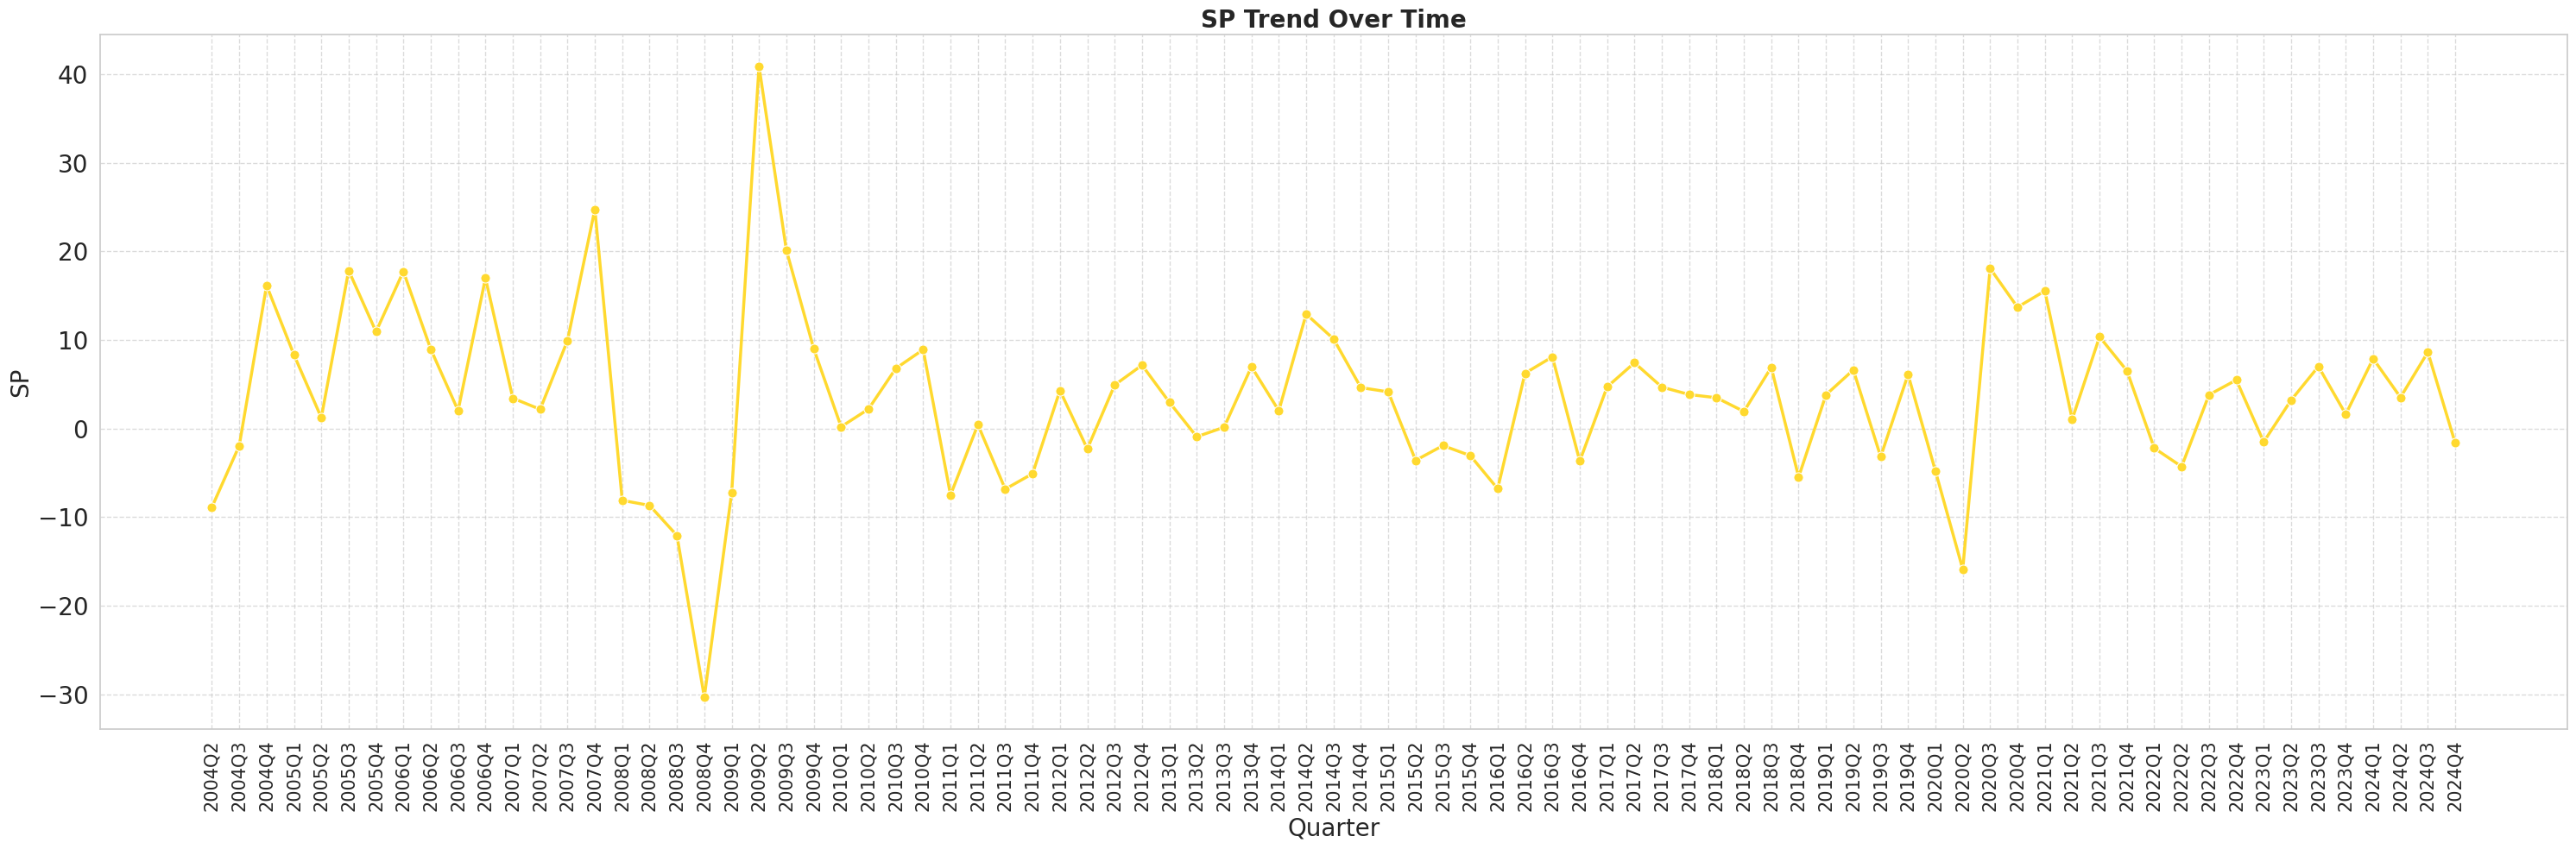

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


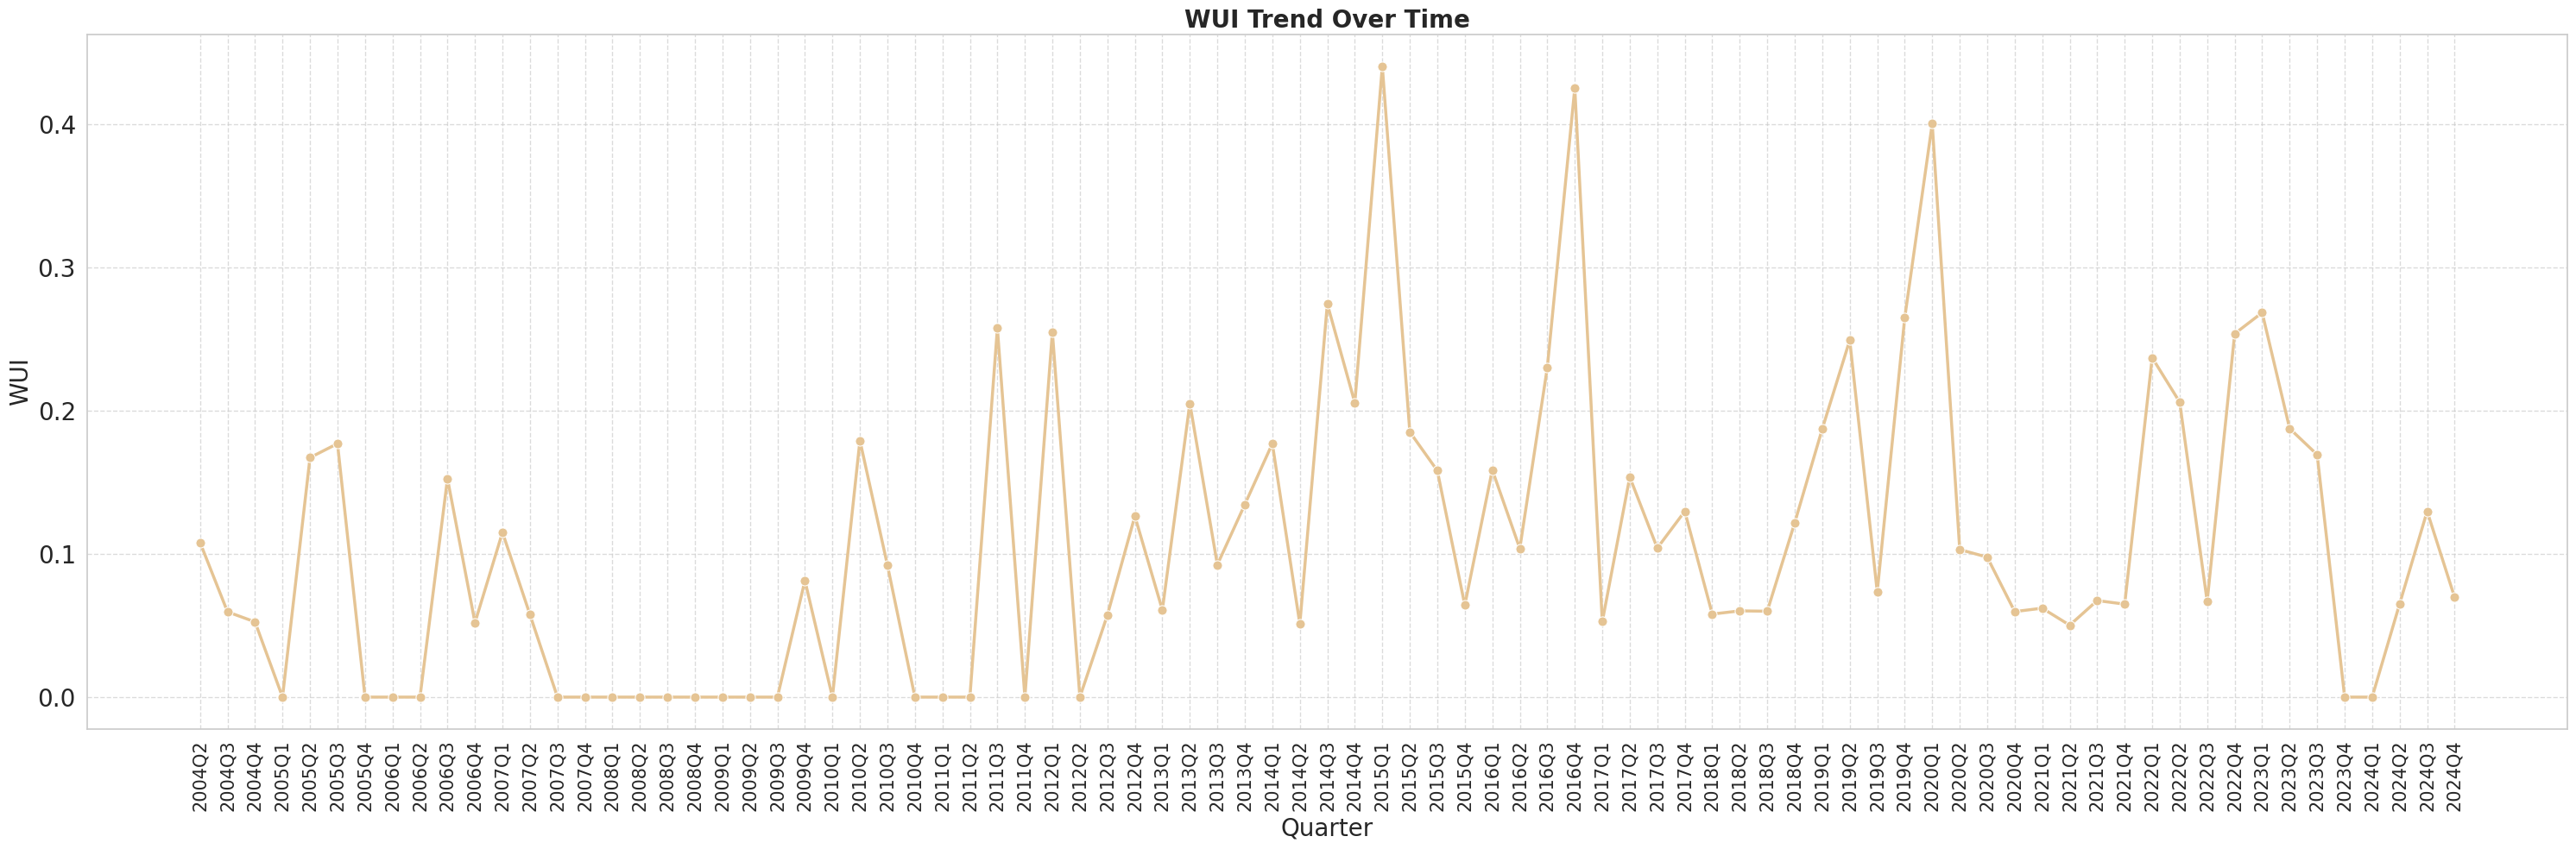

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


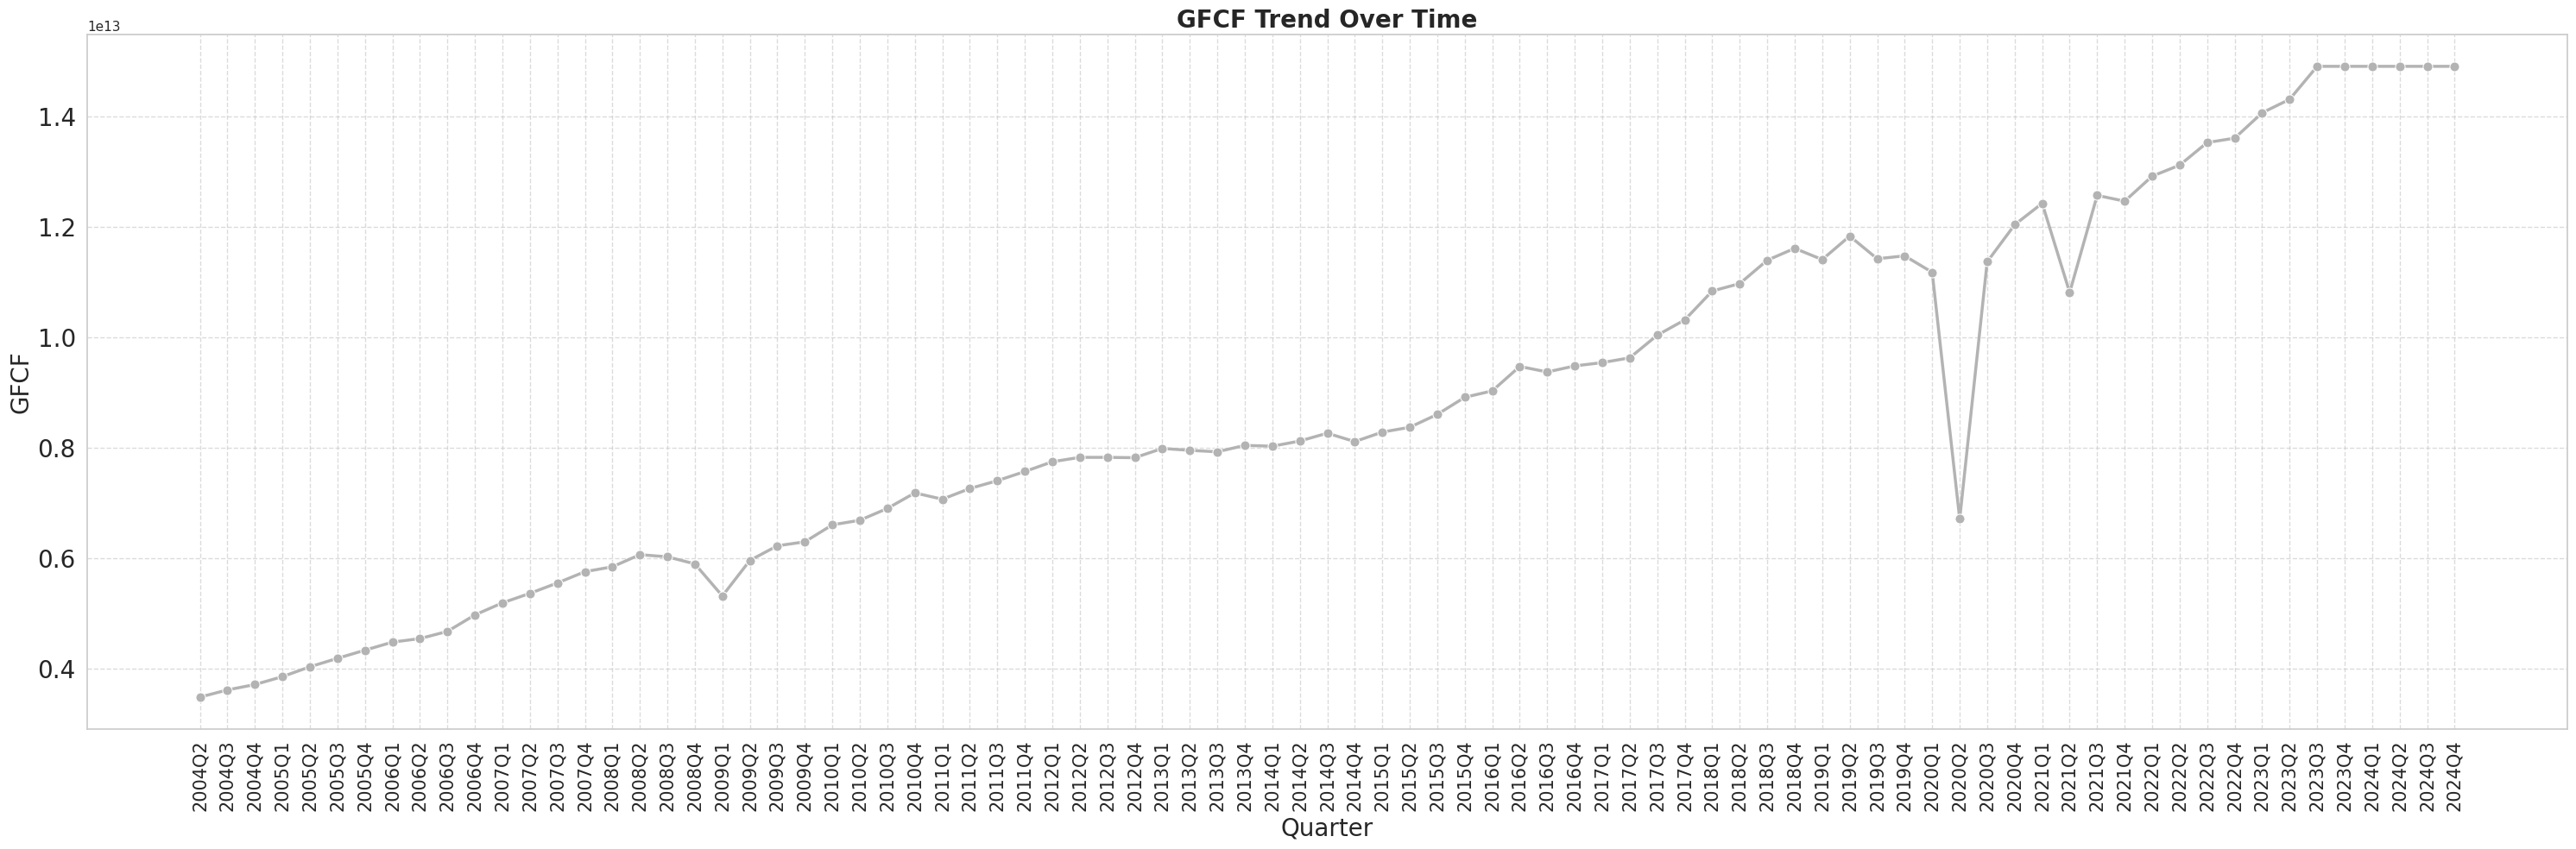

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


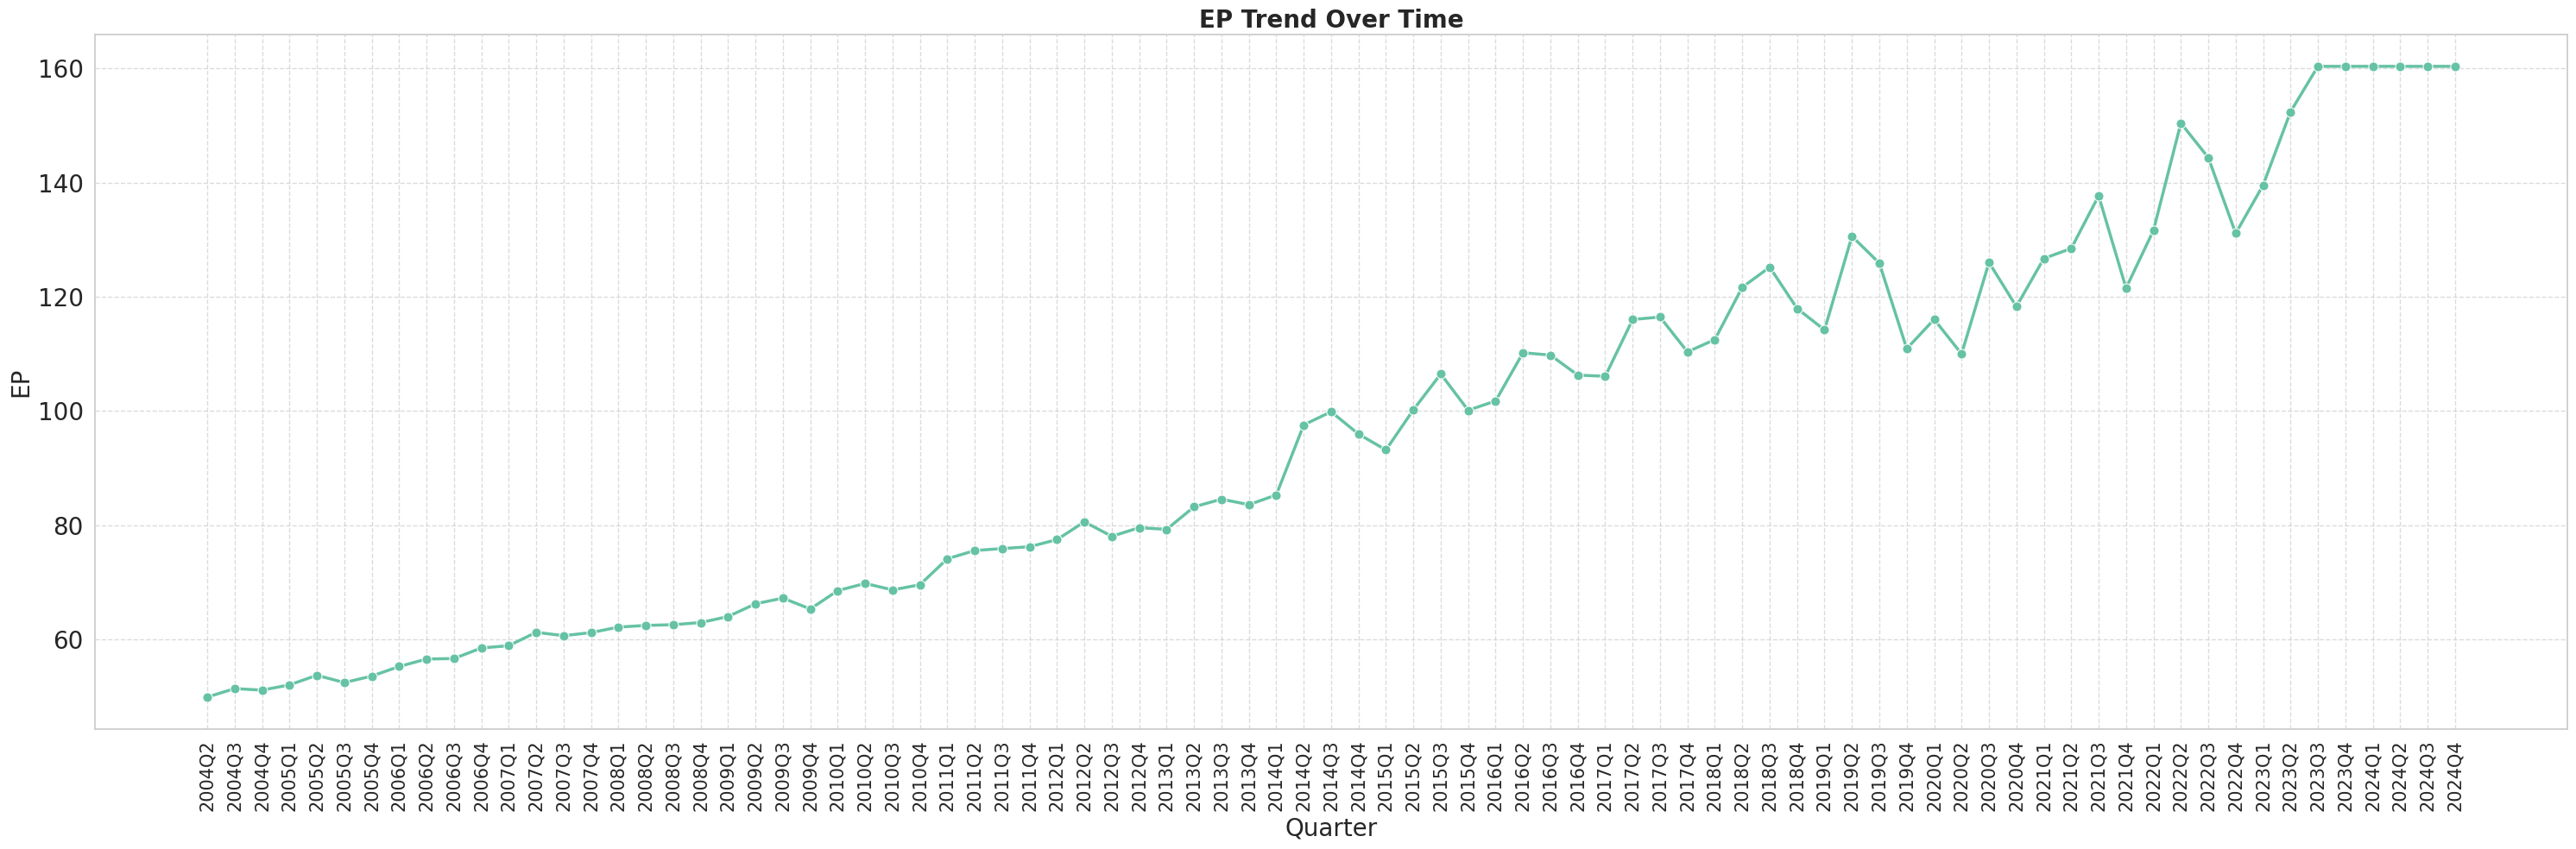

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


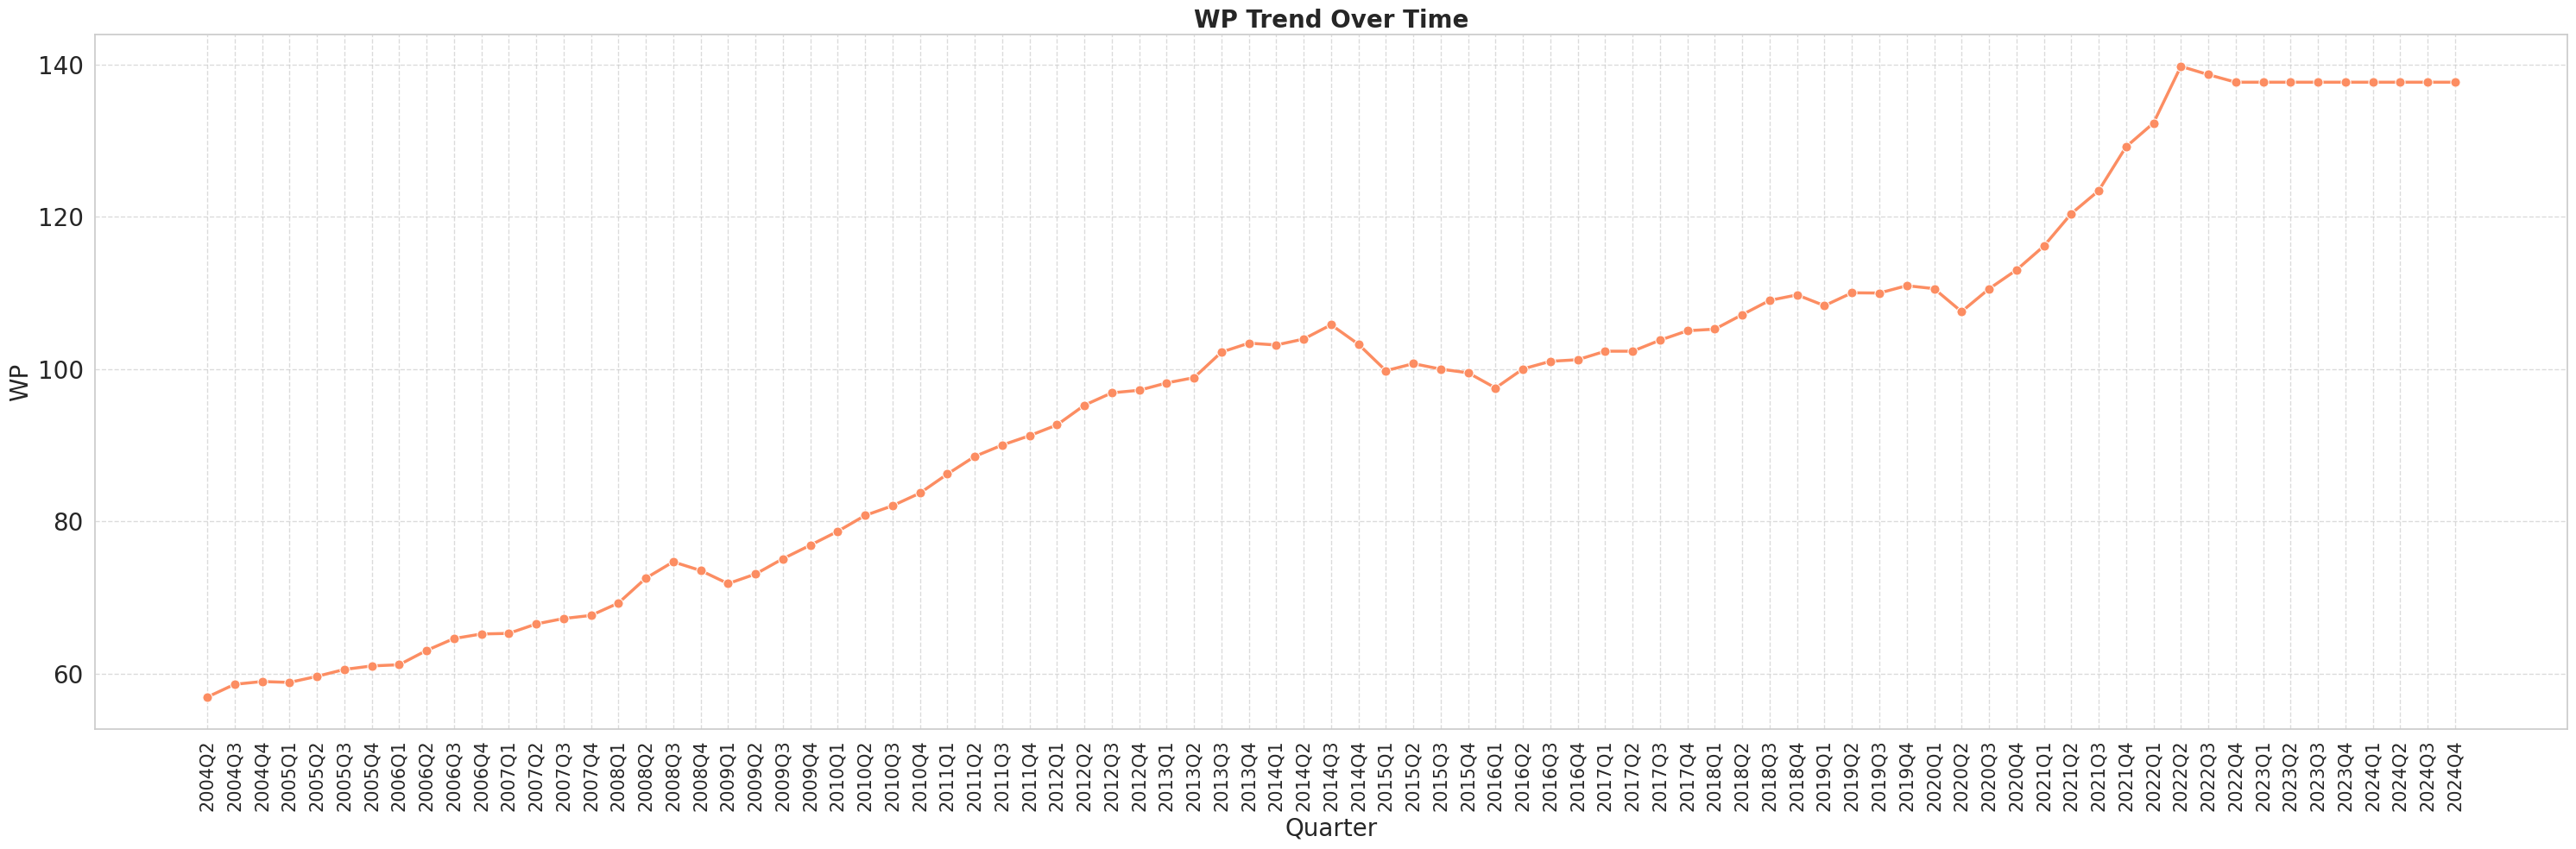

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


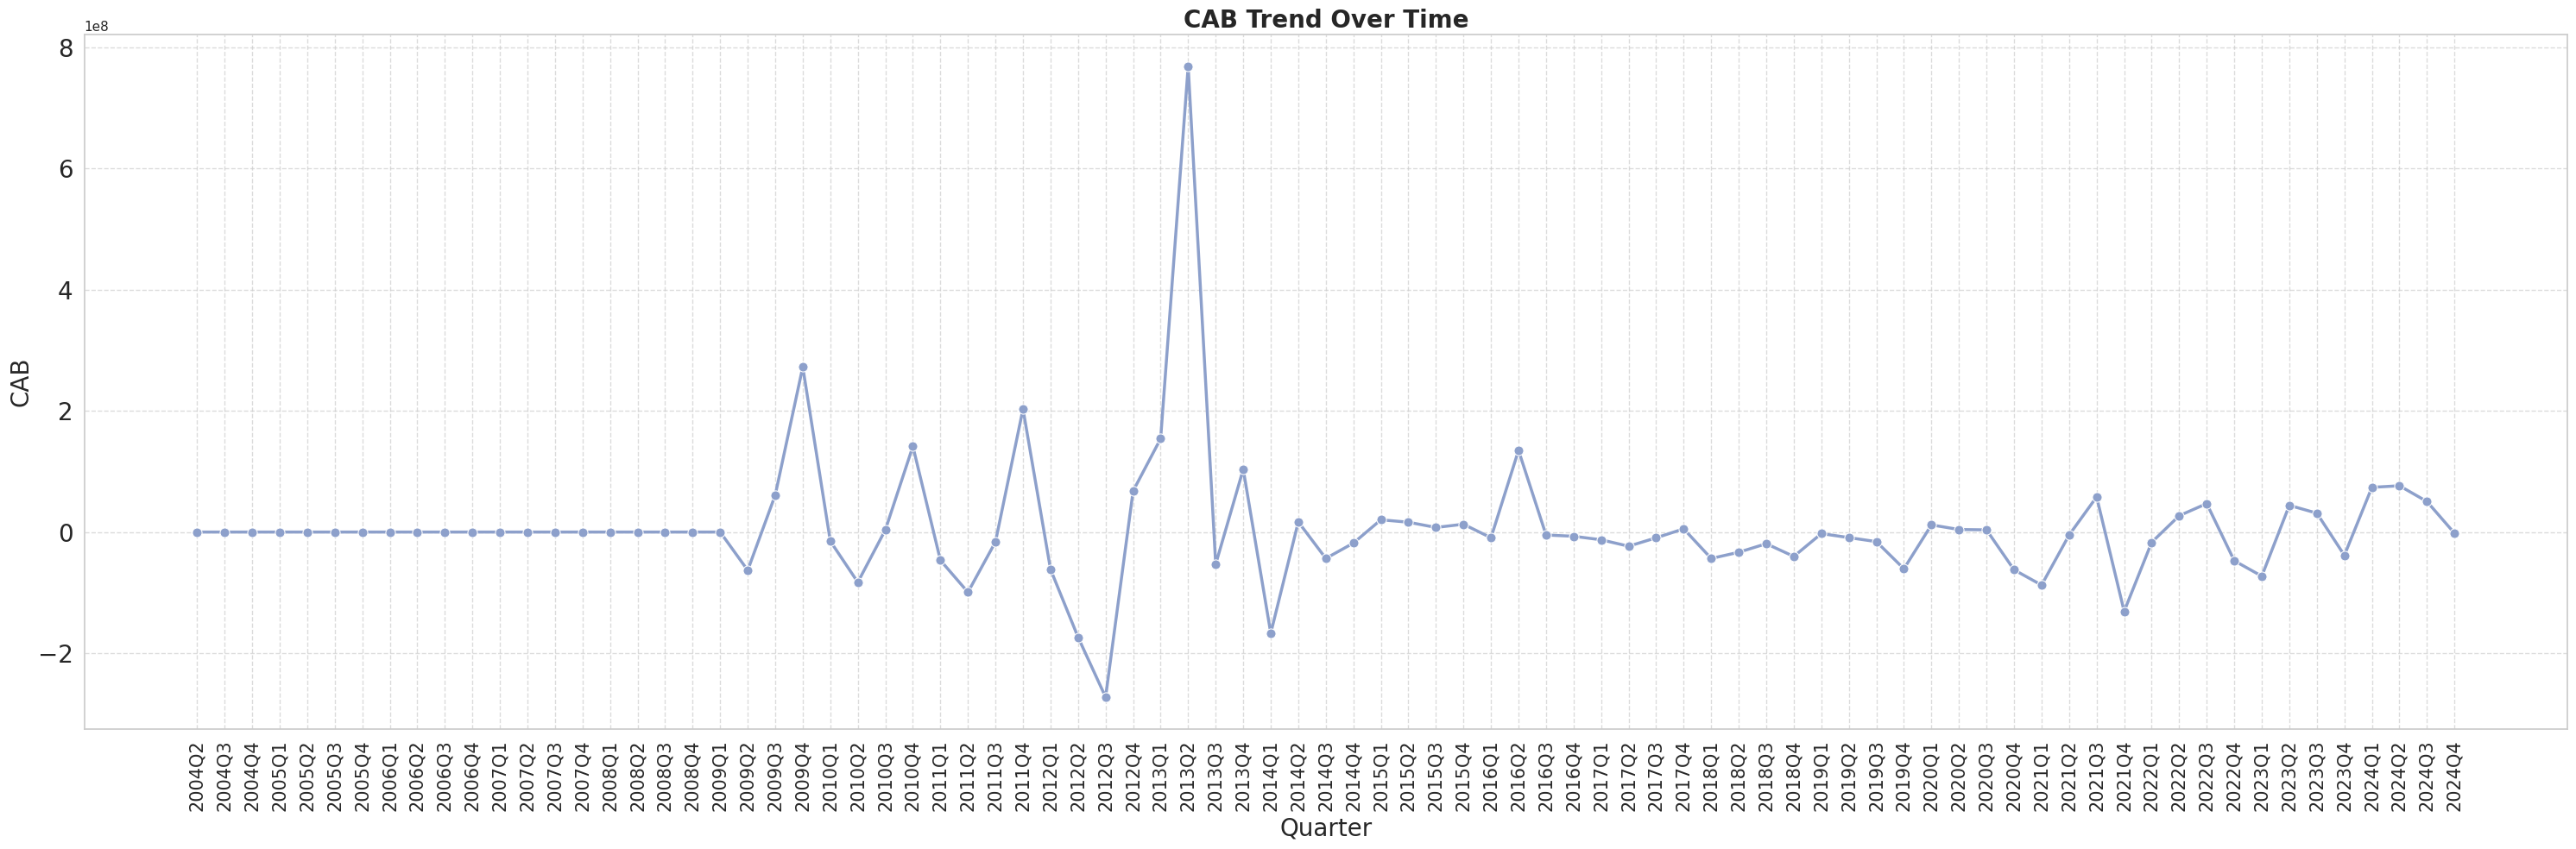

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


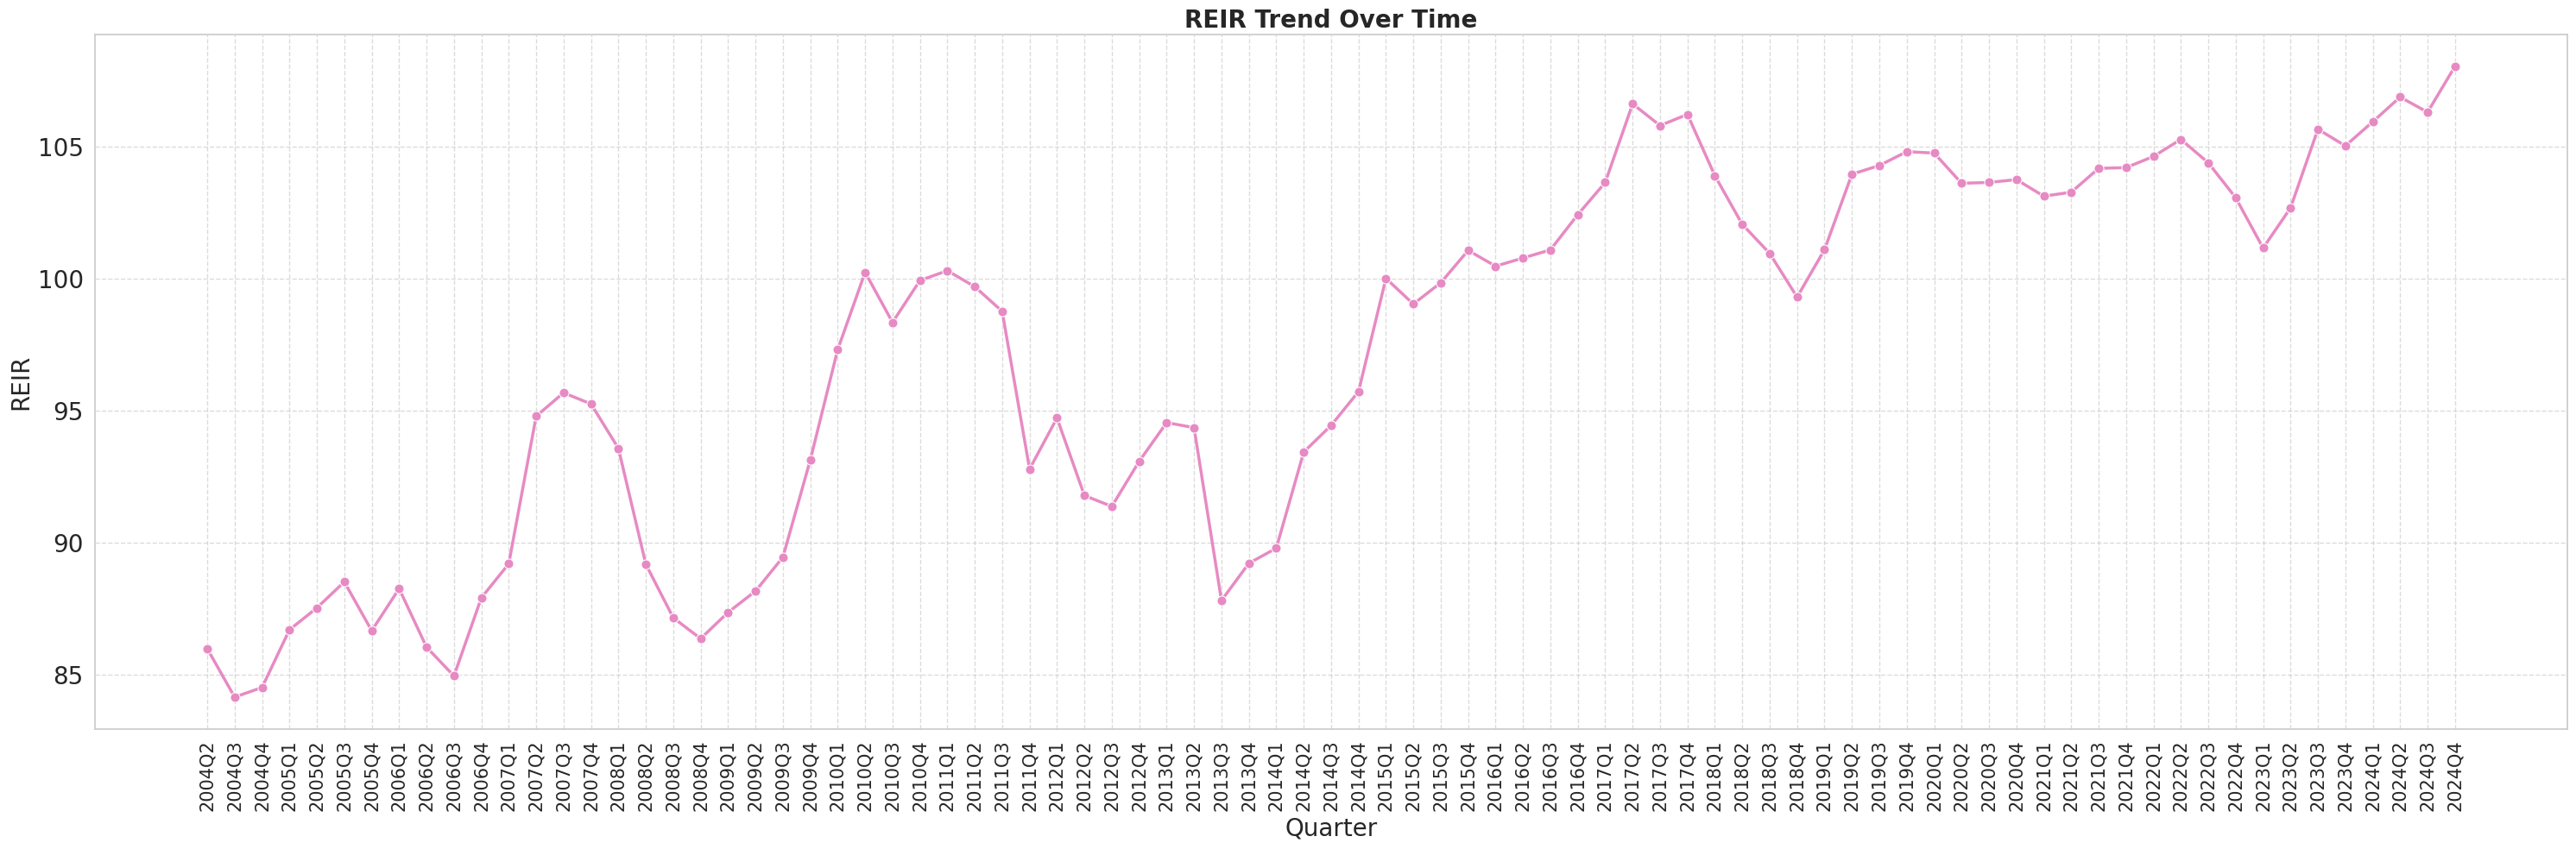

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


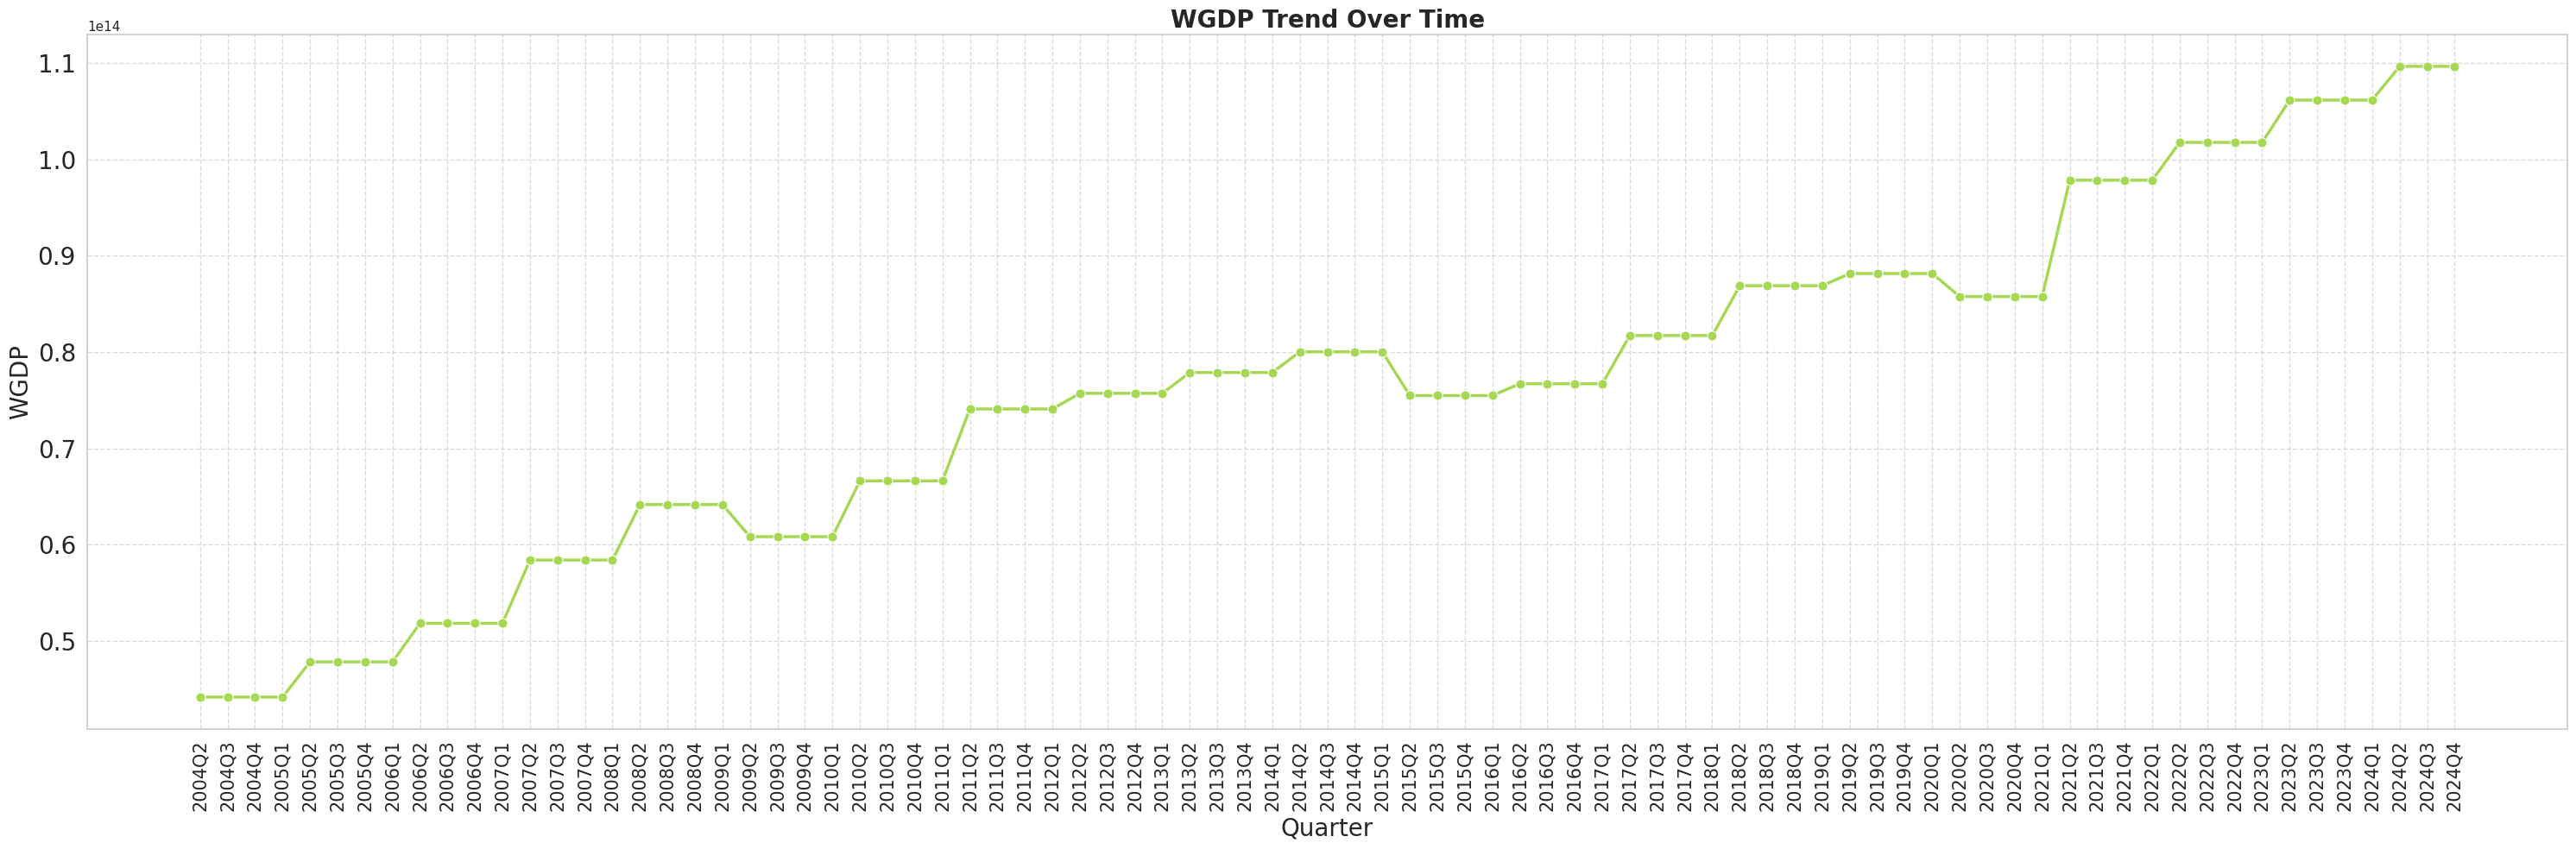

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


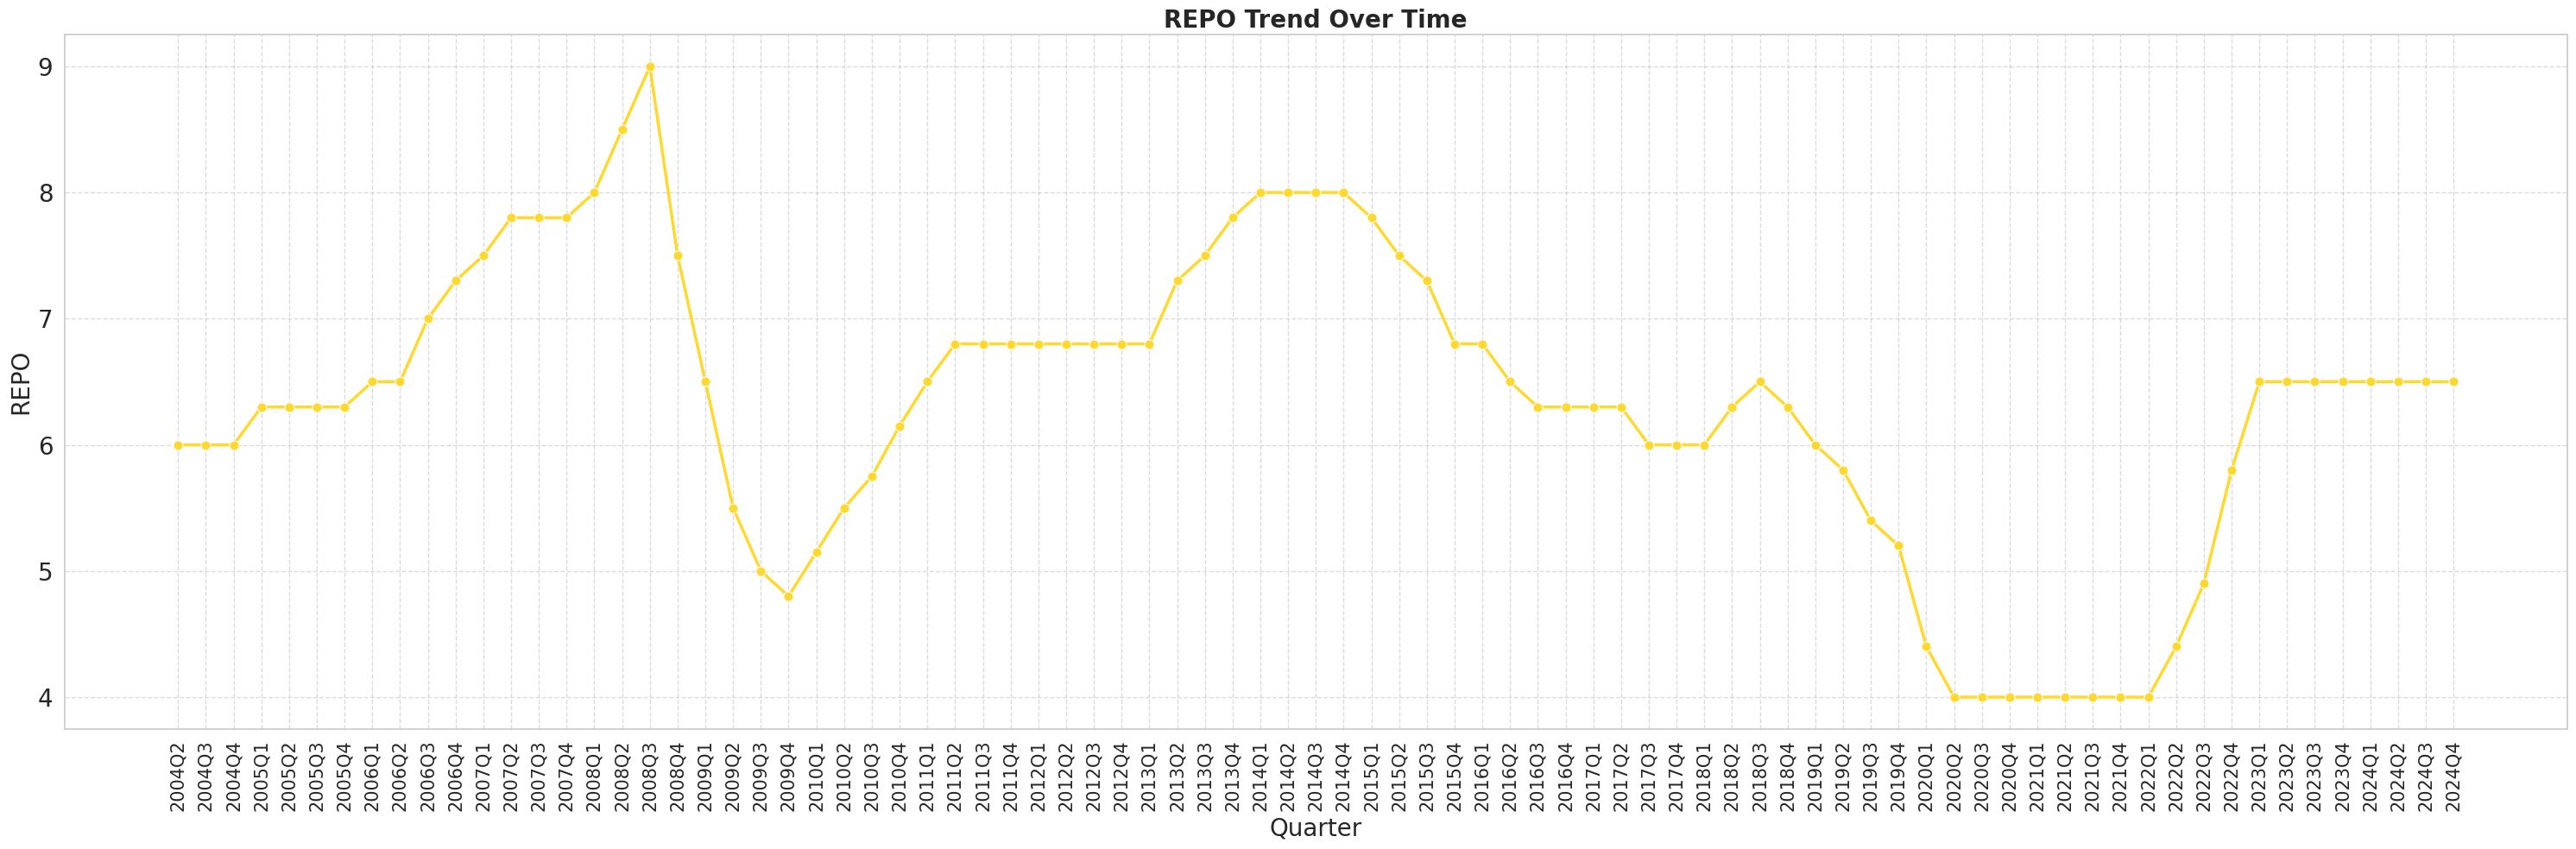

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


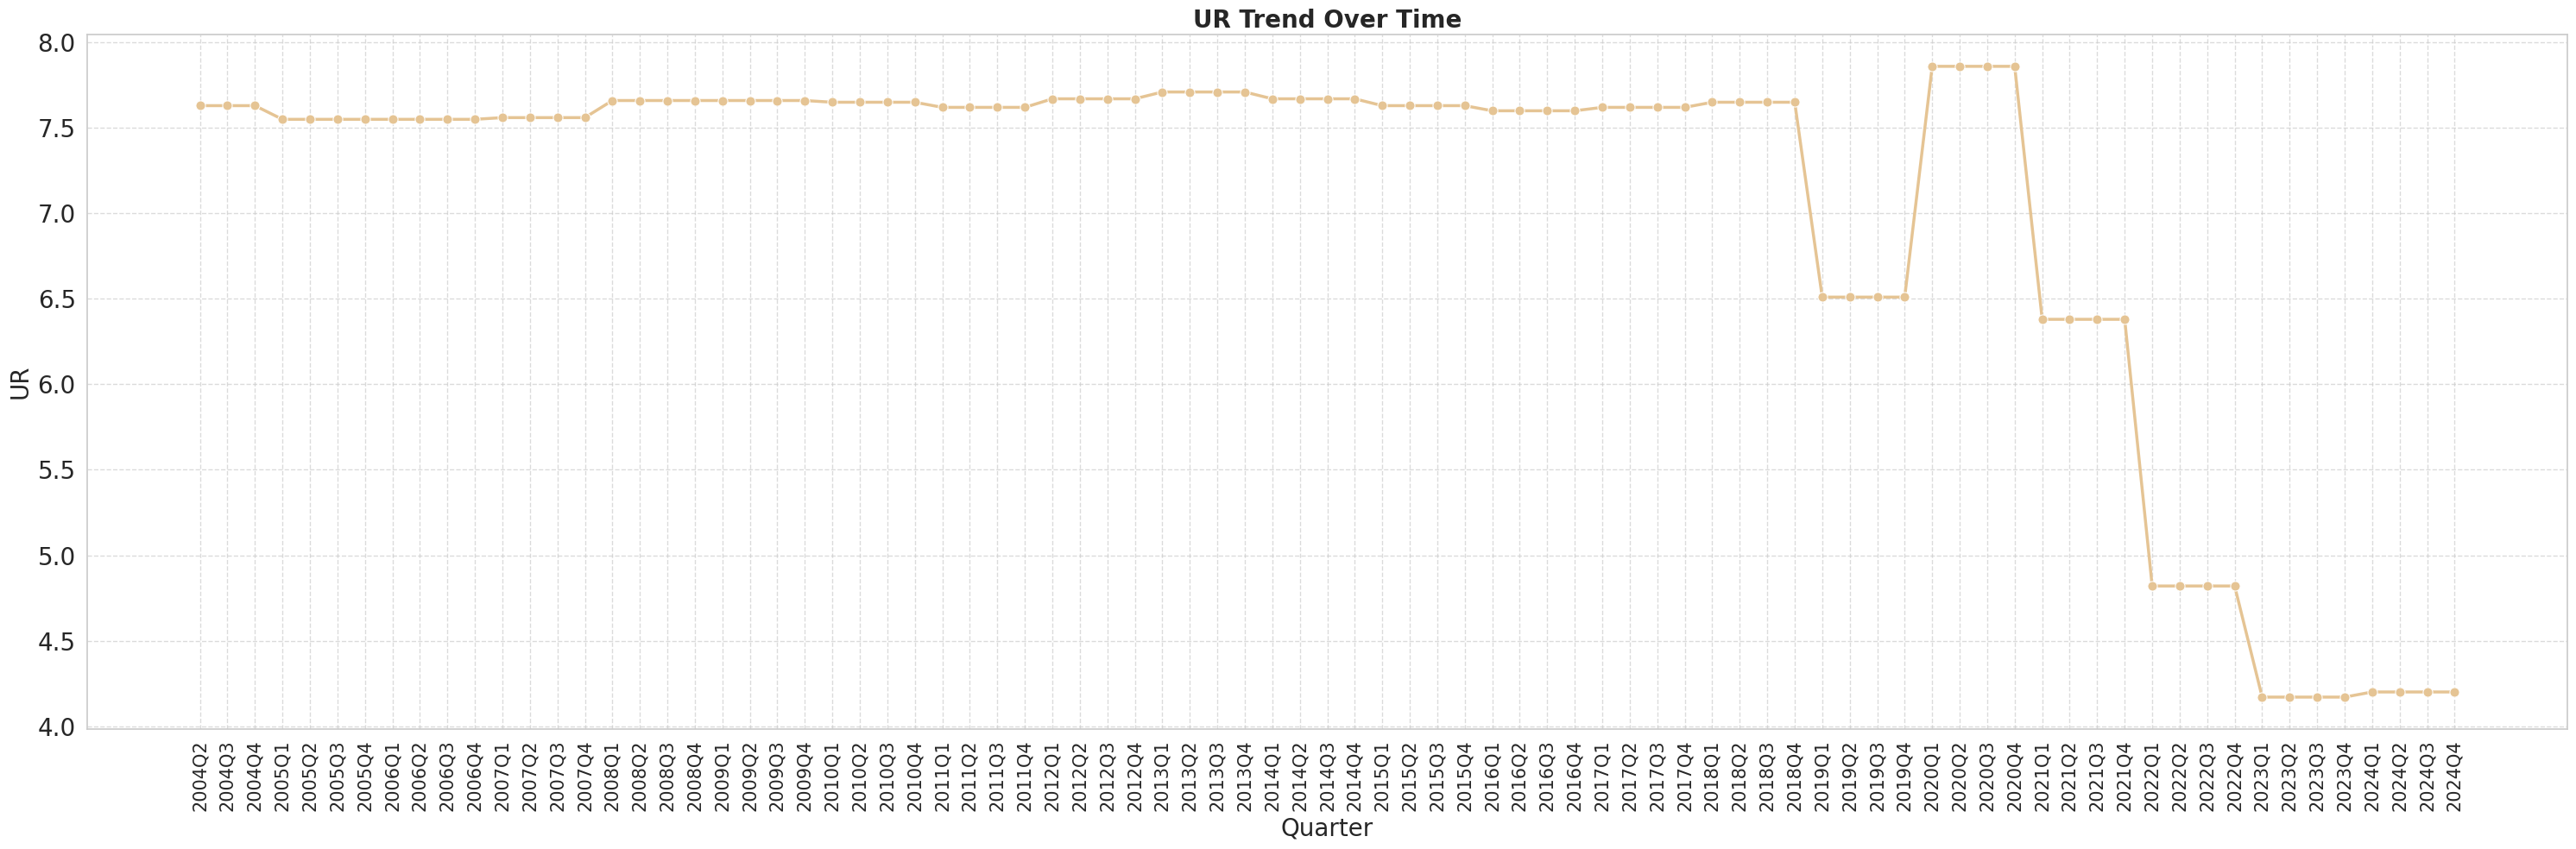

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


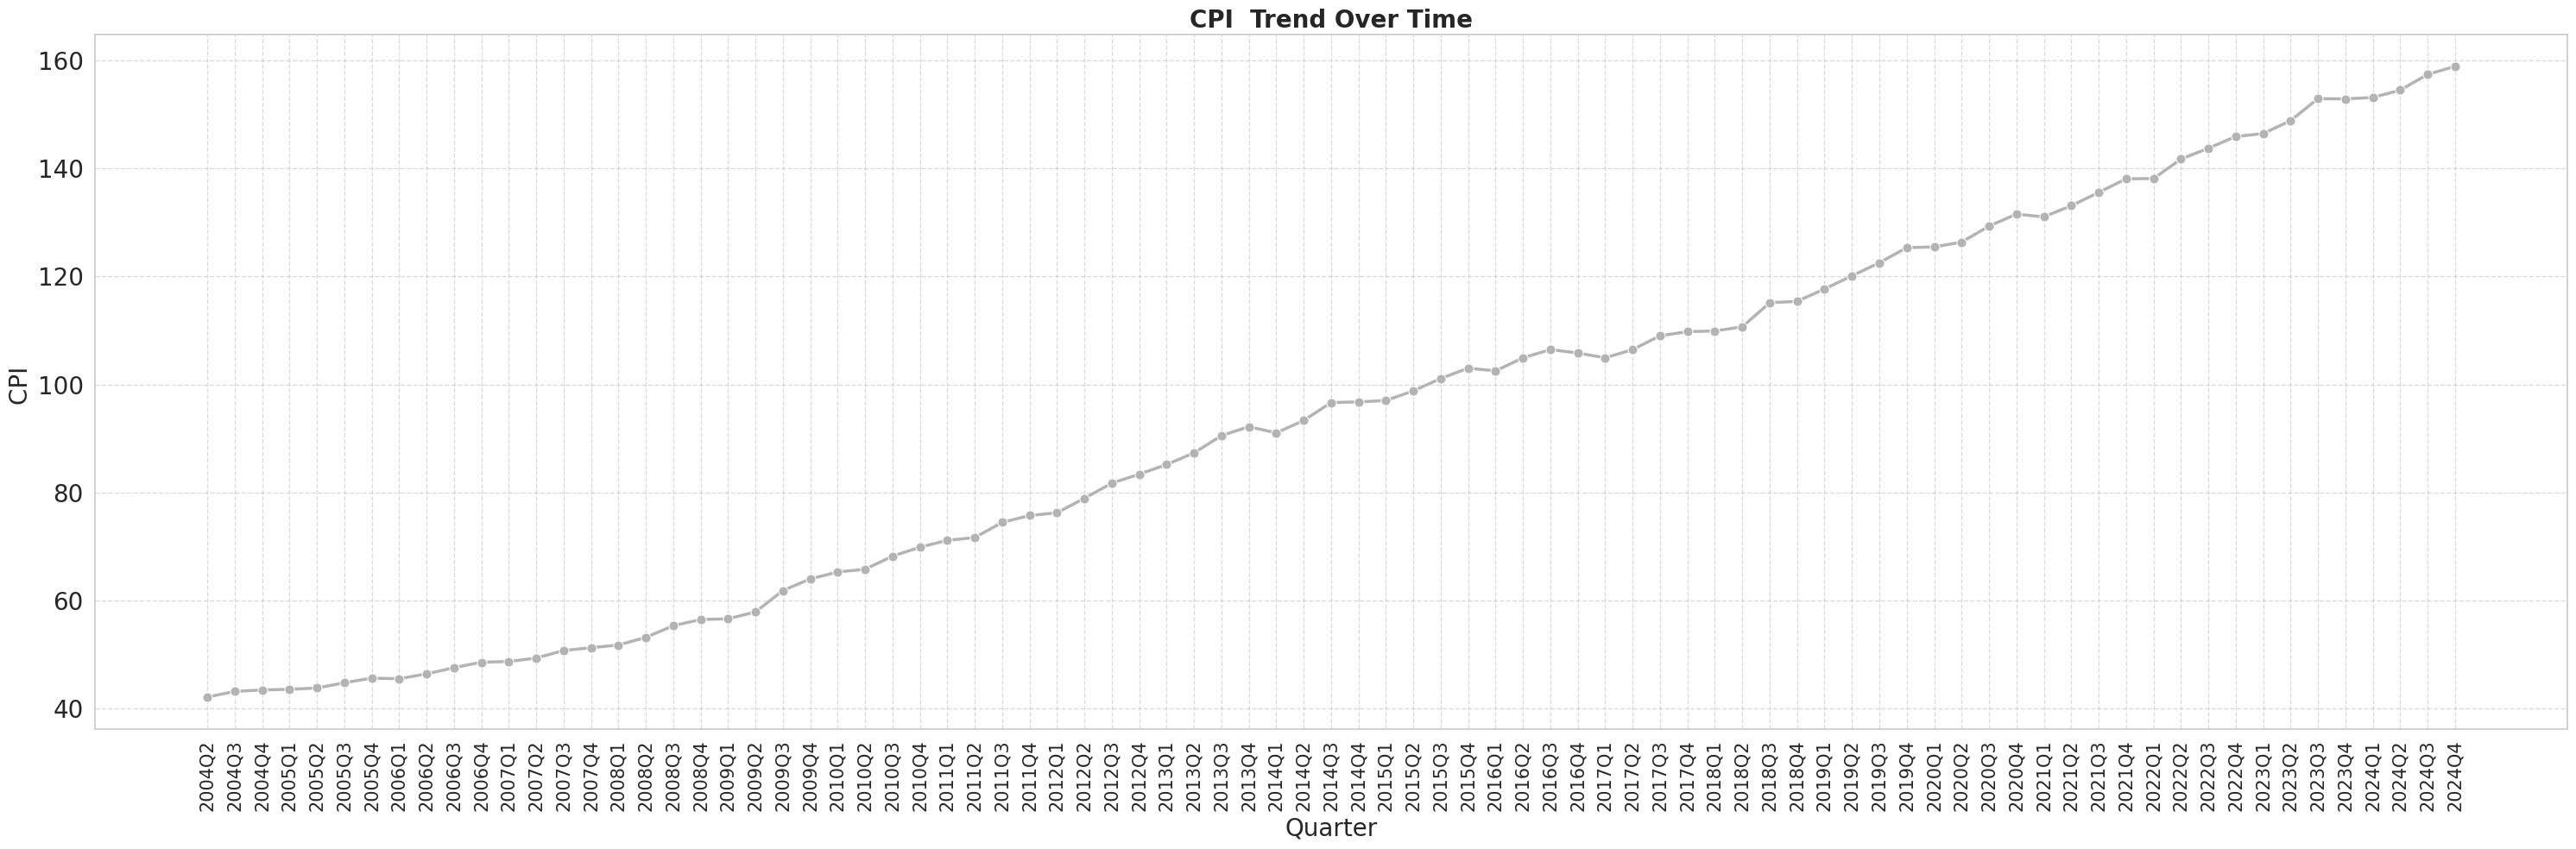

In [52]:
features = ['M3', 'XI RATIO', 'ER', 'PROD', 'INT', 'SP',
            'WUI', 'GFCF', 'EP', 'WP', 'CAB', 'REIR', 'WGDP', 'REPO', 'UR','CPI ']

# Professional color palette
colors = sns.color_palette("Set2", len(features))

# Plot each feature one by one
for idx, feature in enumerate(features):
    plt.figure(figsize=(30,10))
    sns.lineplot(x='Quarter', y=feature, data=df, marker='o', color=colors[idx], linewidth=2.5, markersize=8)
    plt.title(f'{feature} Trend Over Time', fontsize=20, fontweight='bold')
    plt.xlabel('Quarter', fontsize=20)
    plt.ylabel(f'{feature}', fontsize=20)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [53]:
lag_features = ['CPI ', 'M3', 'ER', 'SP', 'REPO']
for col in lag_features:
    df[col + '_Lag'] = df[col].shift(1)

change_features = [ 'CPI ', 'M3', 'ER', 'SP']
for col in change_features:
    df[col + '_Change'] = df[col].pct_change()

rolling_features = [ 'CPI ', 'M3', 'ER', 'SP']
for col in rolling_features:
    df[col + '_Roll'] = df[col].rolling(window=4).mean()

df['CPI_M3_Interaction'] = df['CPI '] * df['M3']

df['CPI_Shock'] = (df['CPI _Change'] > 0.05).astype(int)

print("New columns after Feature Engineering:\n", df.columns.tolist())


New columns after Feature Engineering:
 ['Quarter', 'CPI ', 'GDP', 'M3', 'XI RATIO', 'ER', 'PROD', 'INT', 'SP', 'WUI', 'GFCF', 'EP', 'WP', 'CAB', 'REIR', 'WGDP', 'REPO', 'UR', 'CPI _Lag', 'M3_Lag', 'ER_Lag', 'SP_Lag', 'REPO_Lag', 'CPI _Change', 'M3_Change', 'ER_Change', 'SP_Change', 'CPI _Roll', 'M3_Roll', 'ER_Roll', 'SP_Roll', 'CPI_M3_Interaction', 'CPI_Shock']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


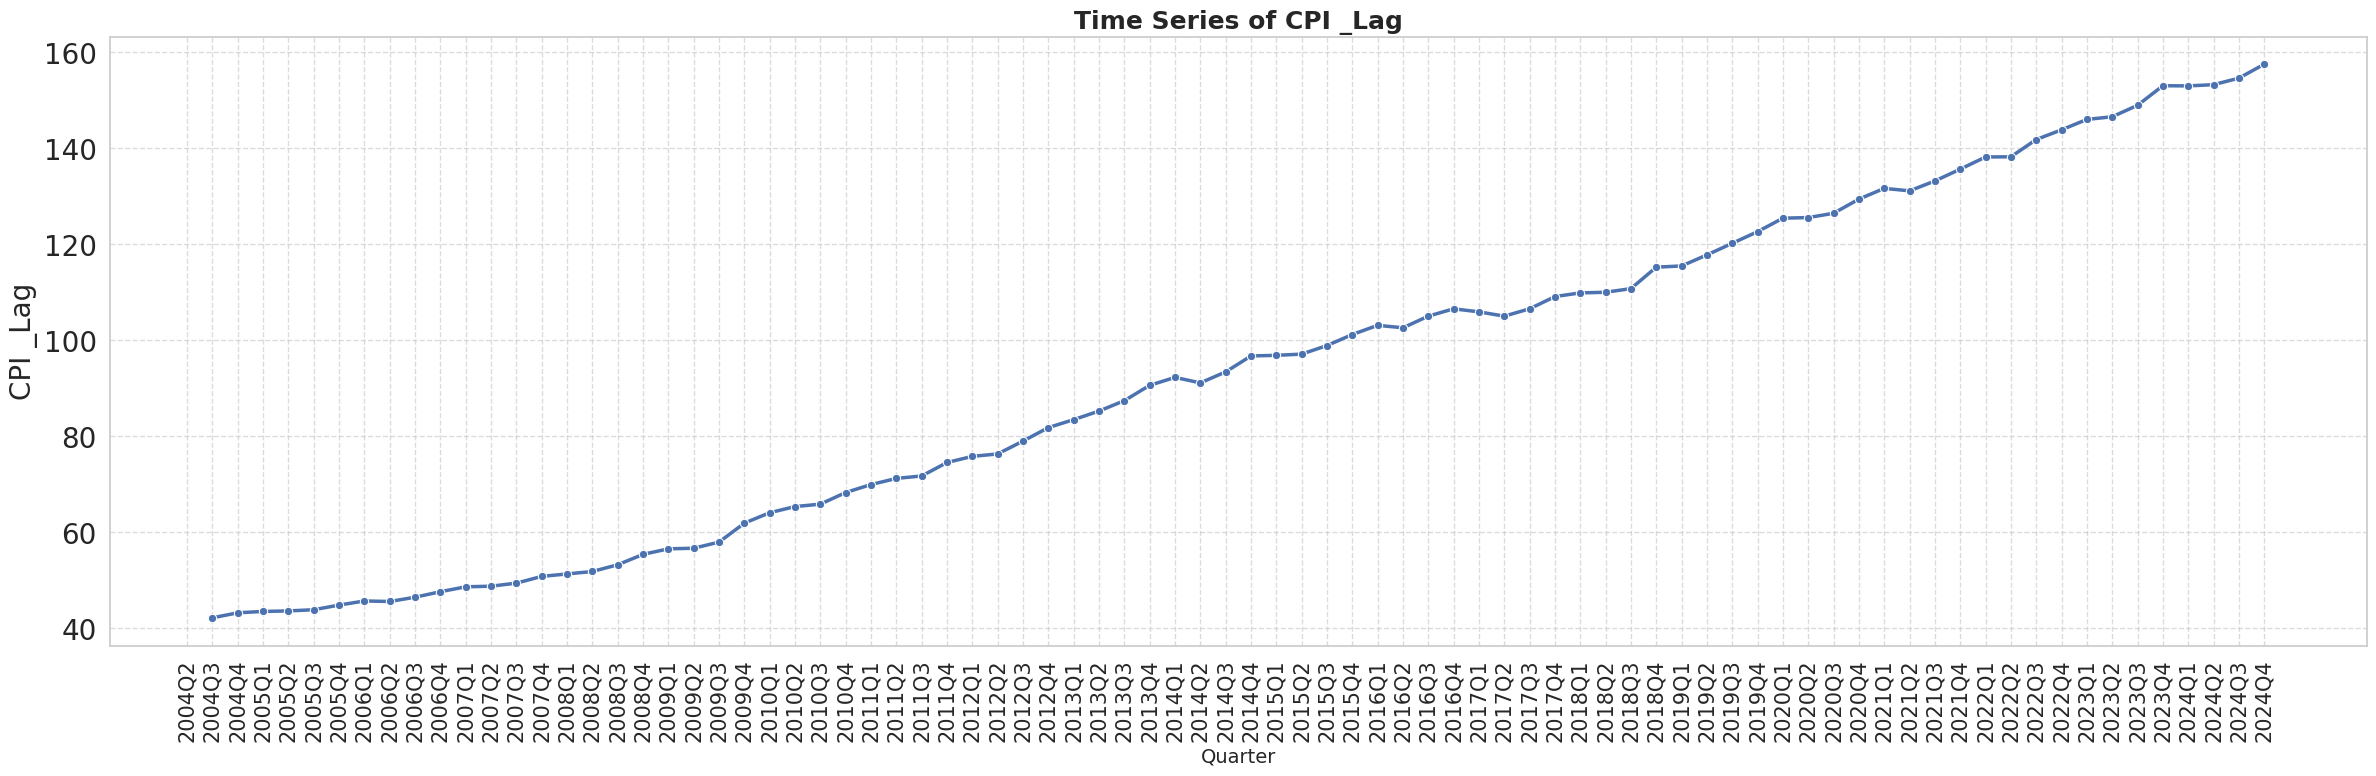

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


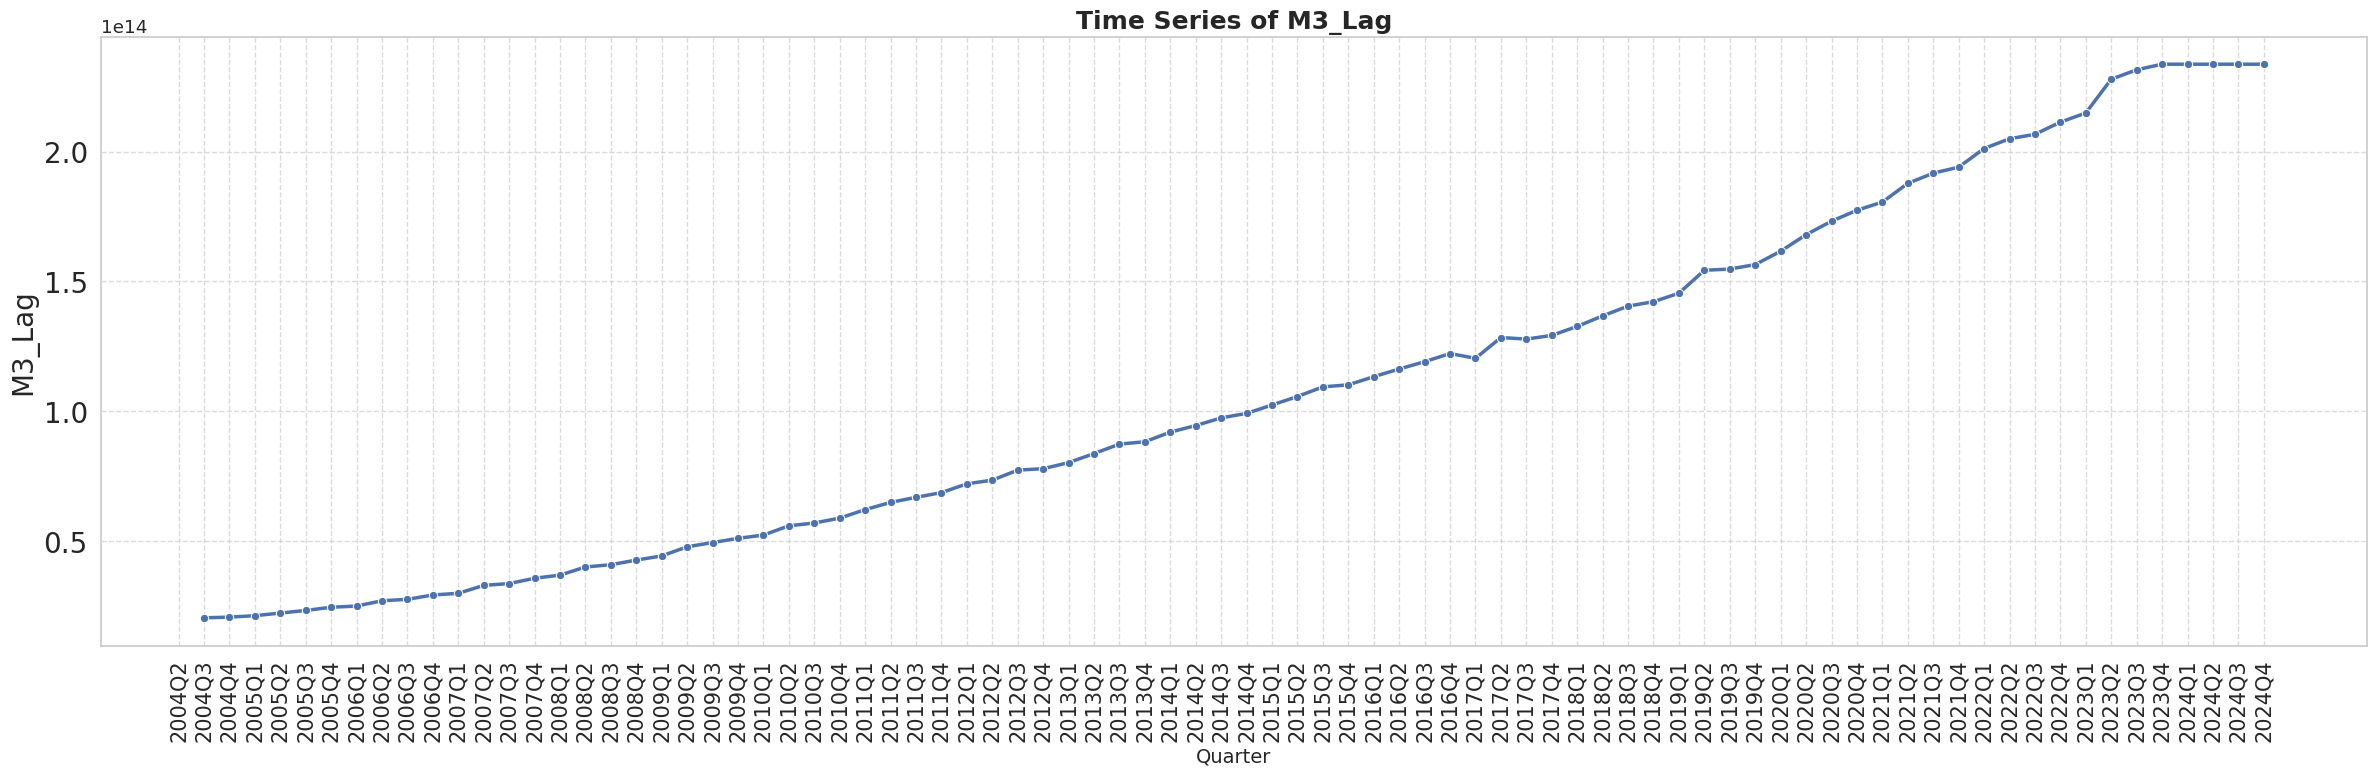

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


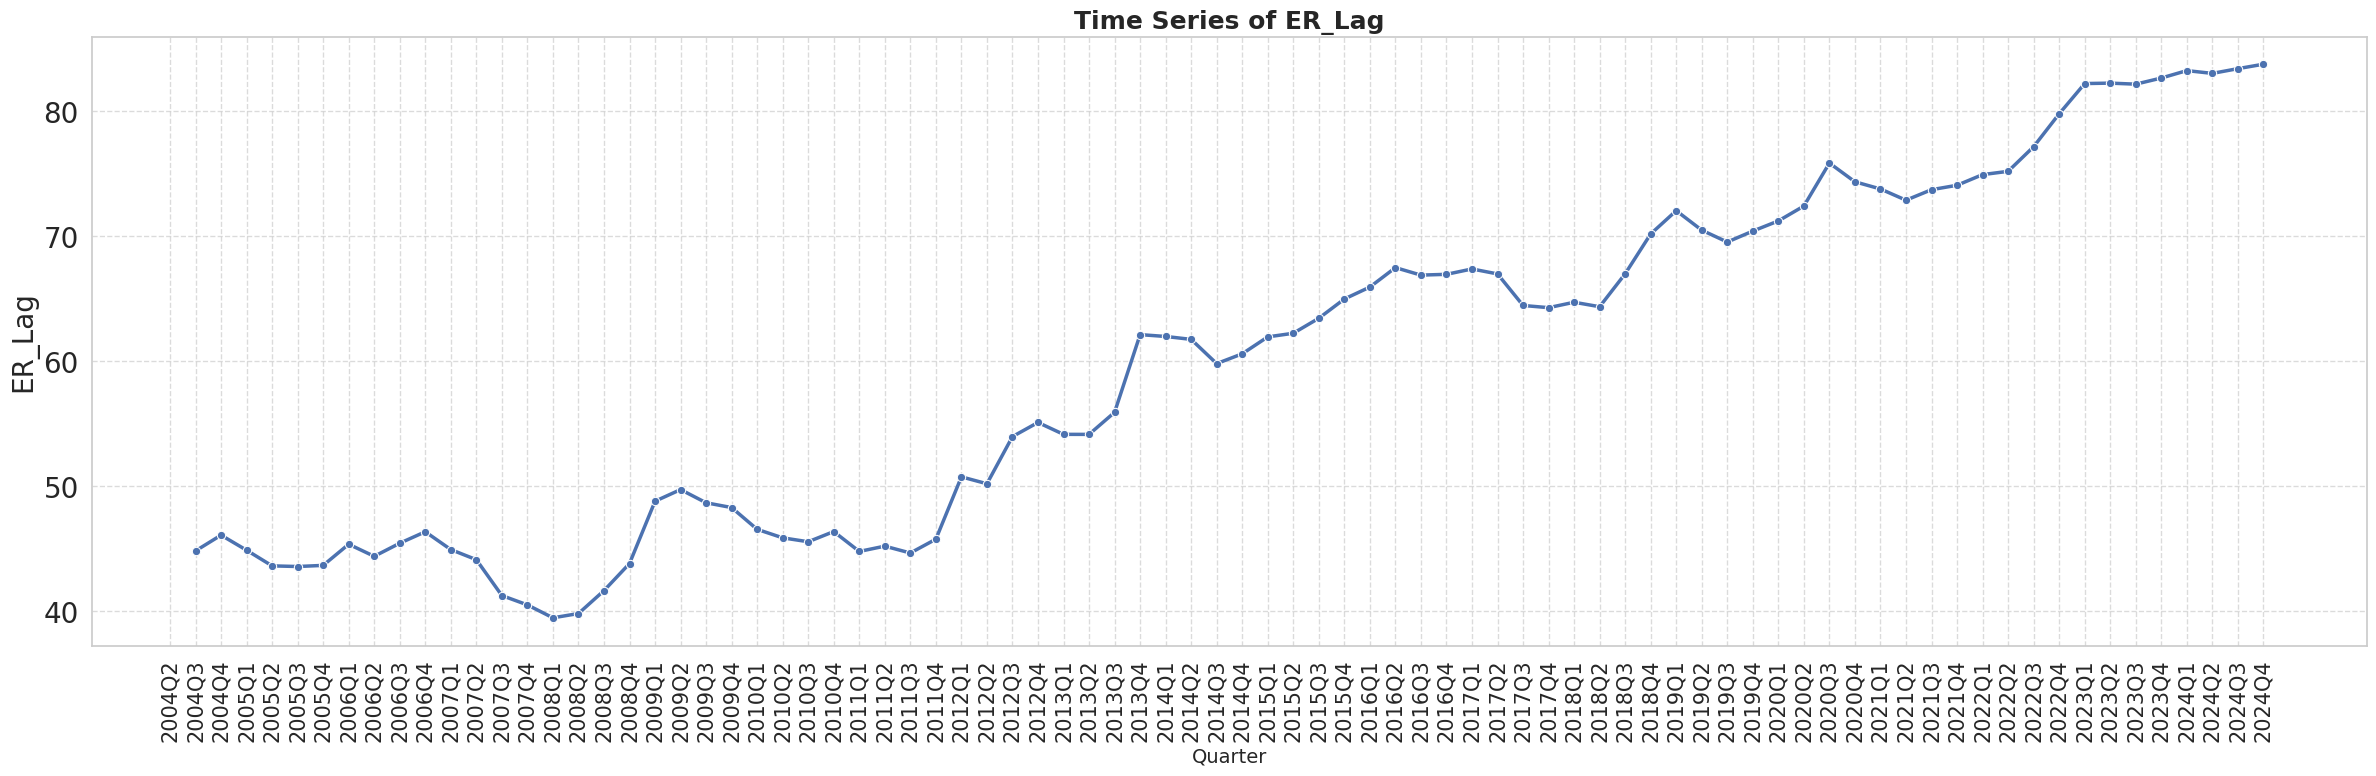

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


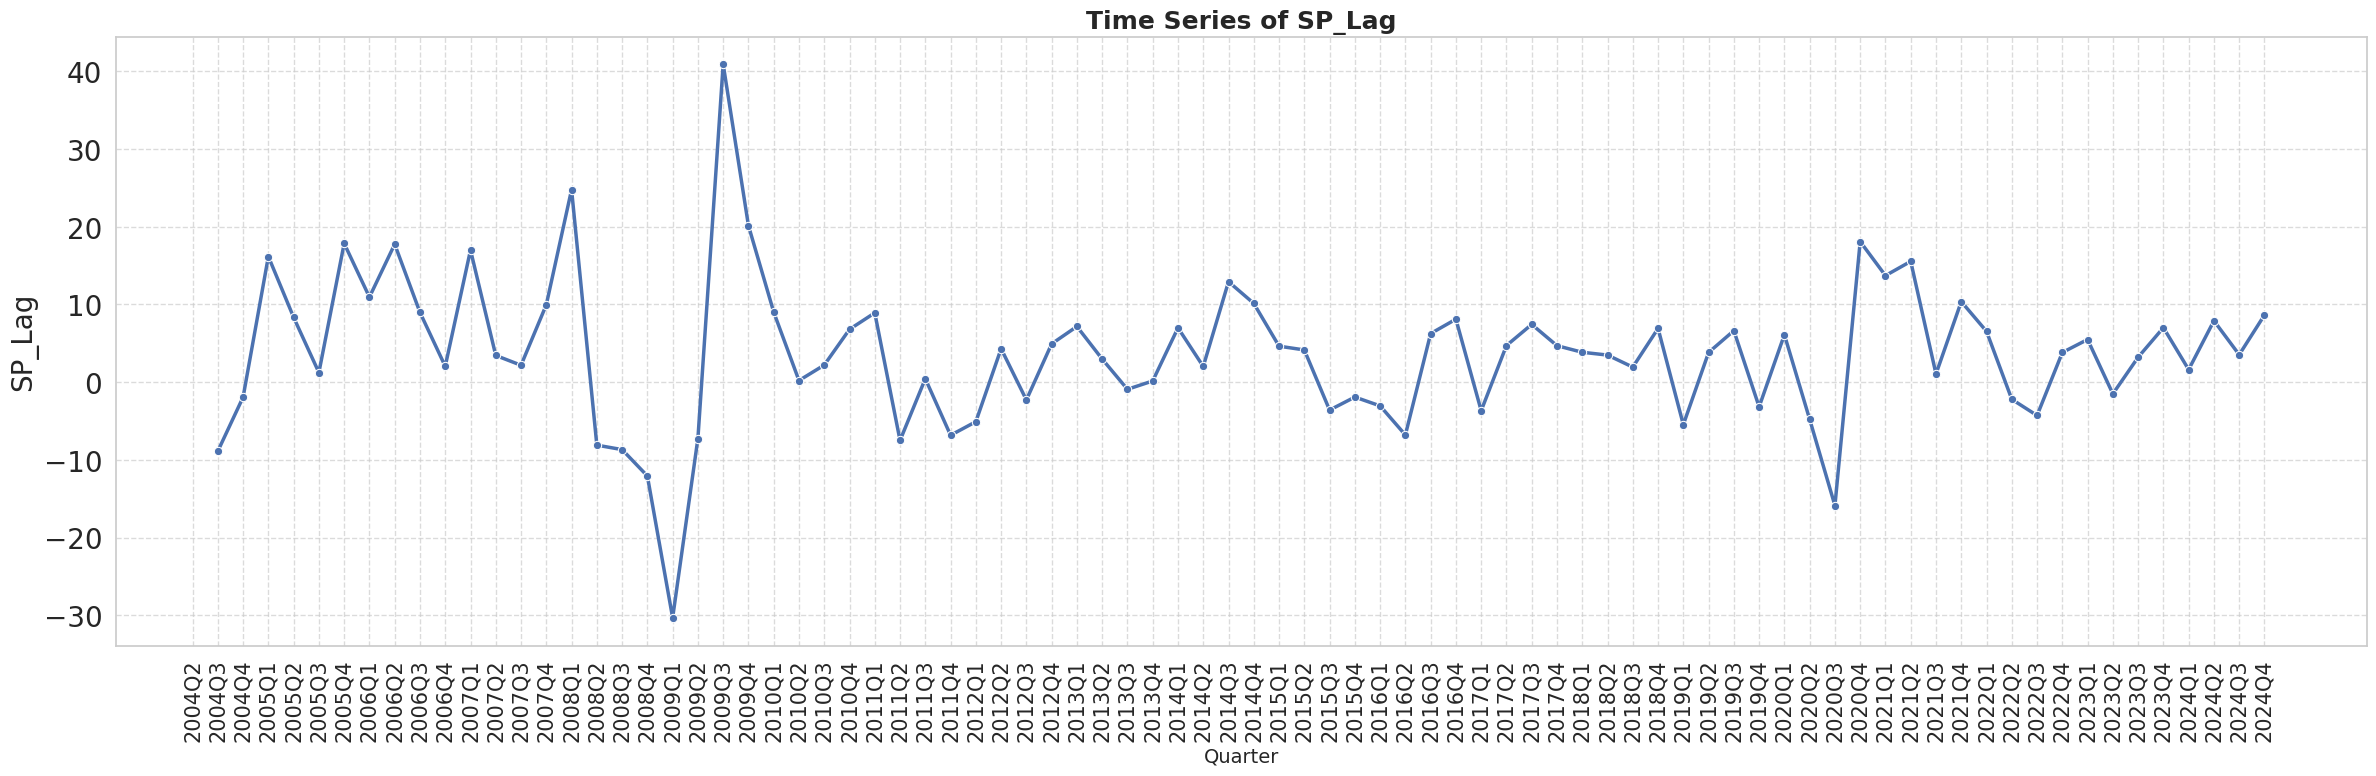

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


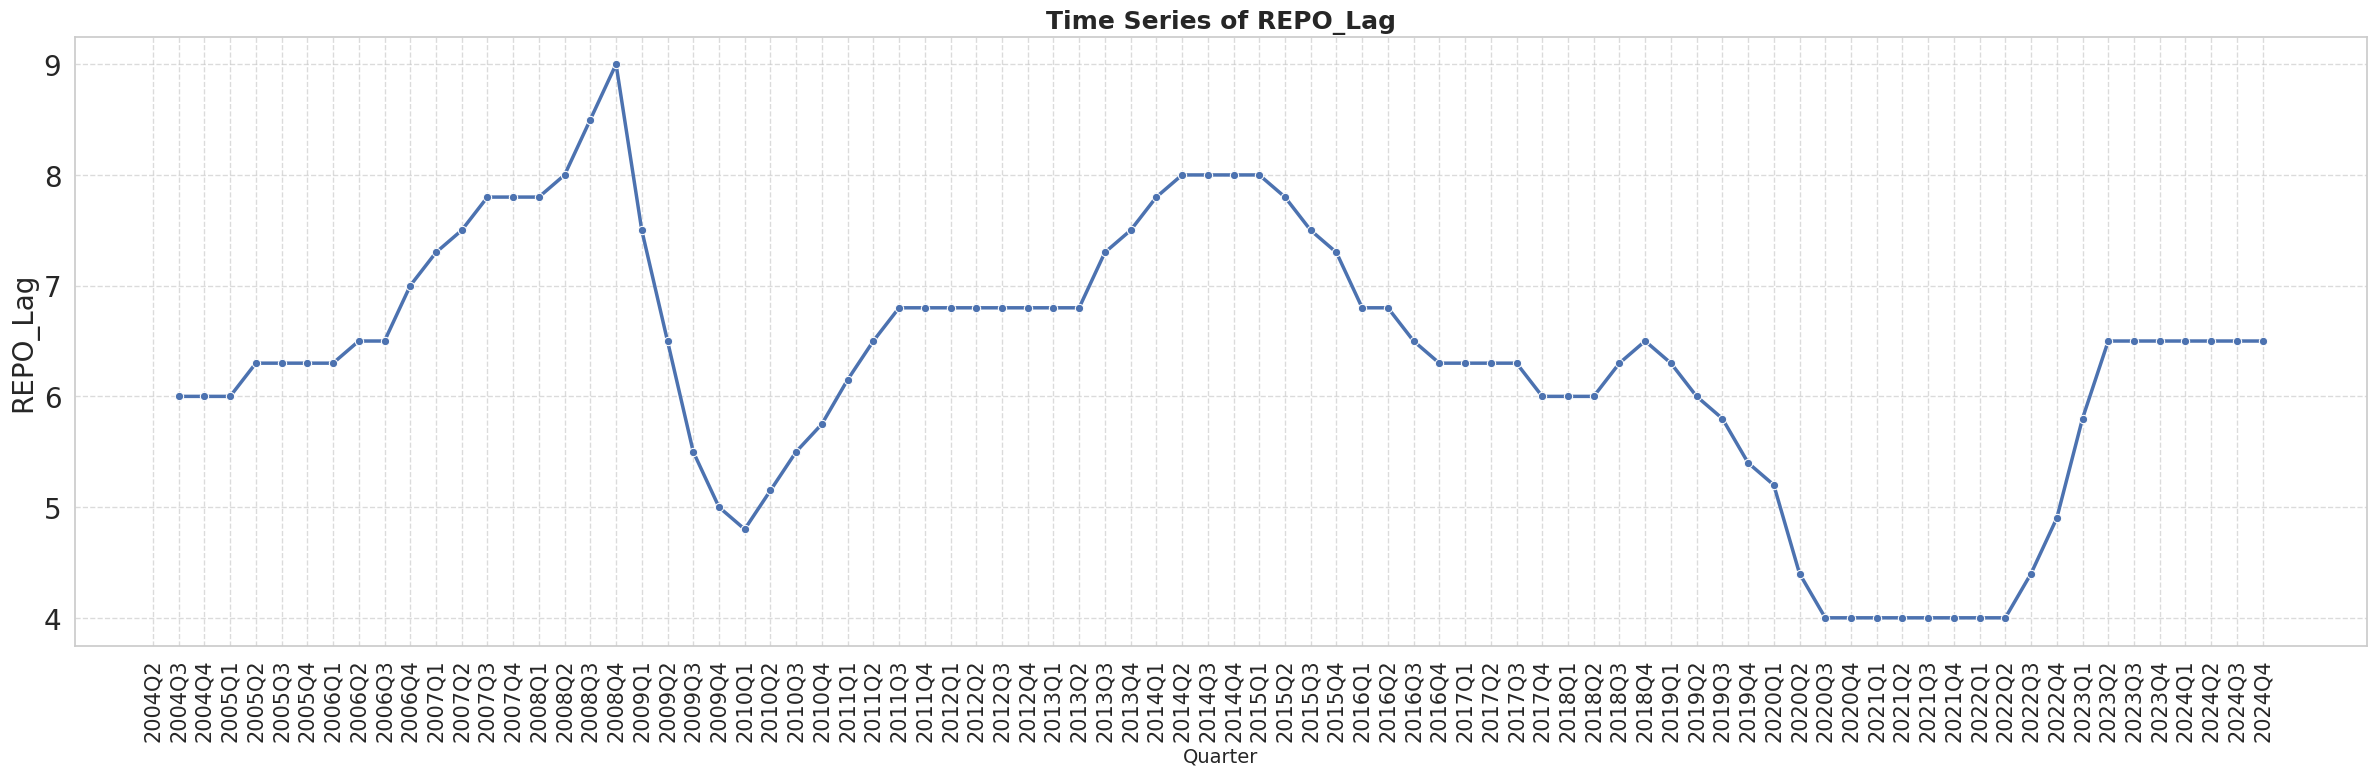

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


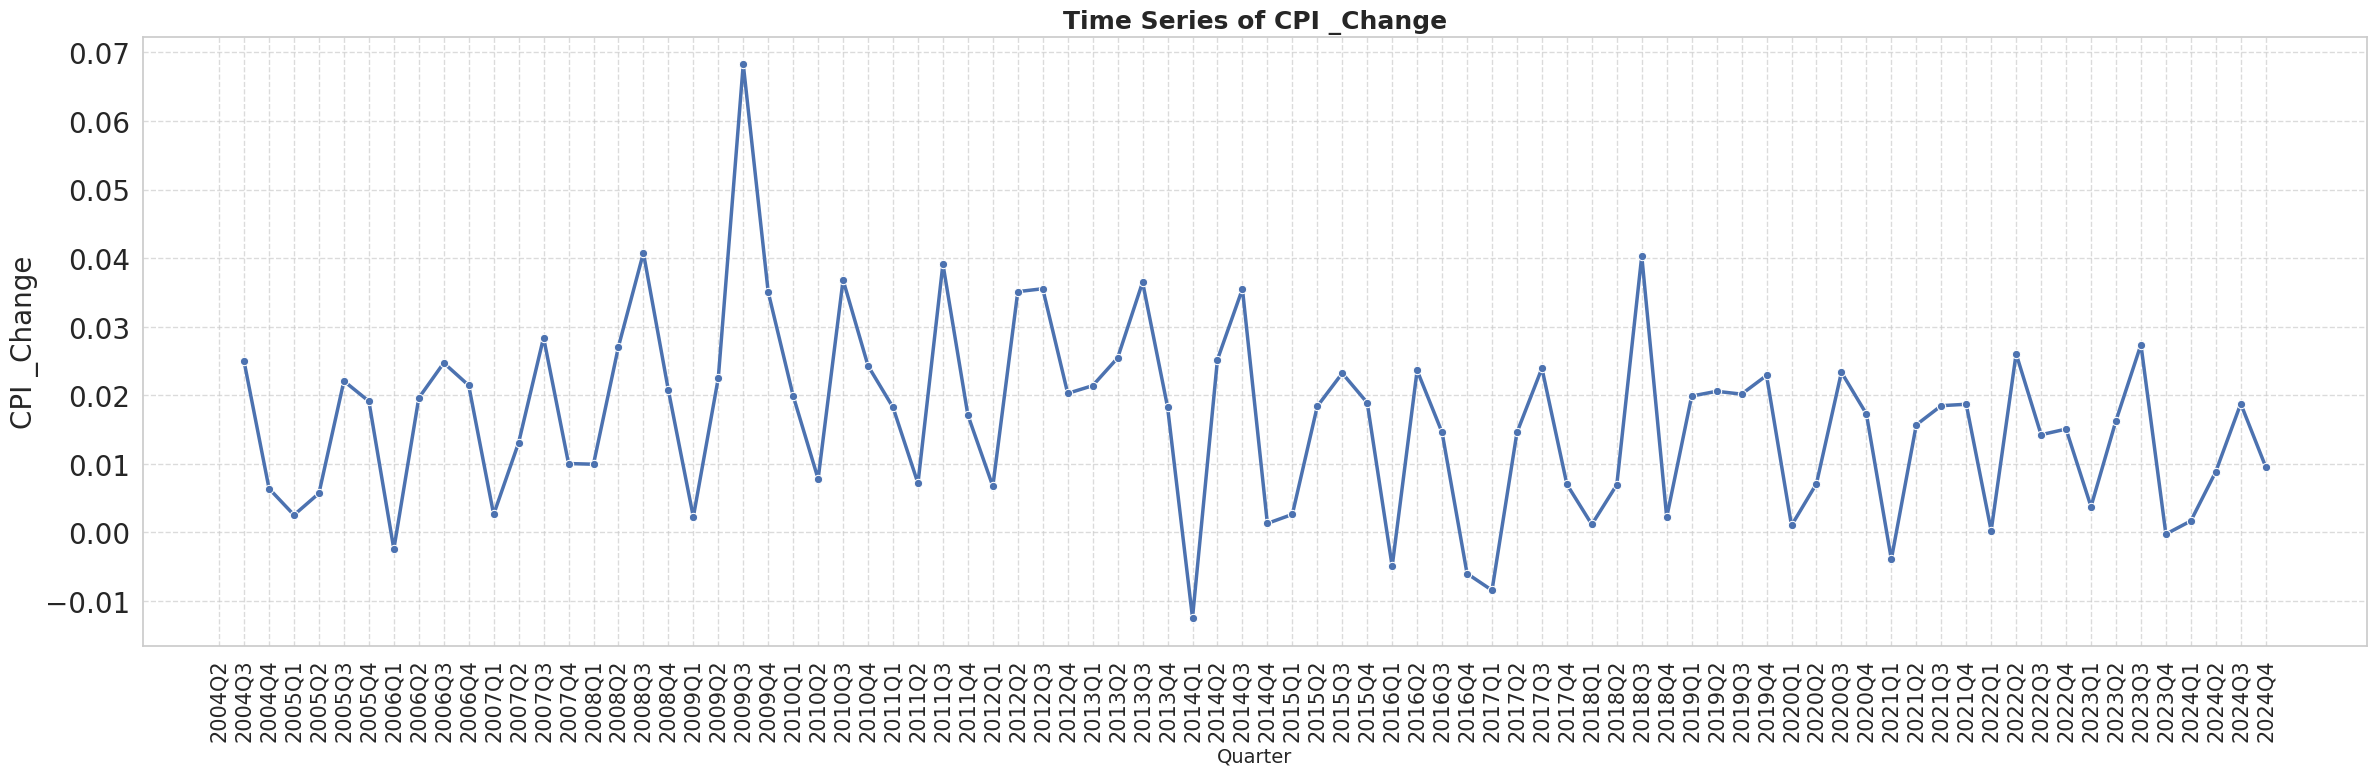

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


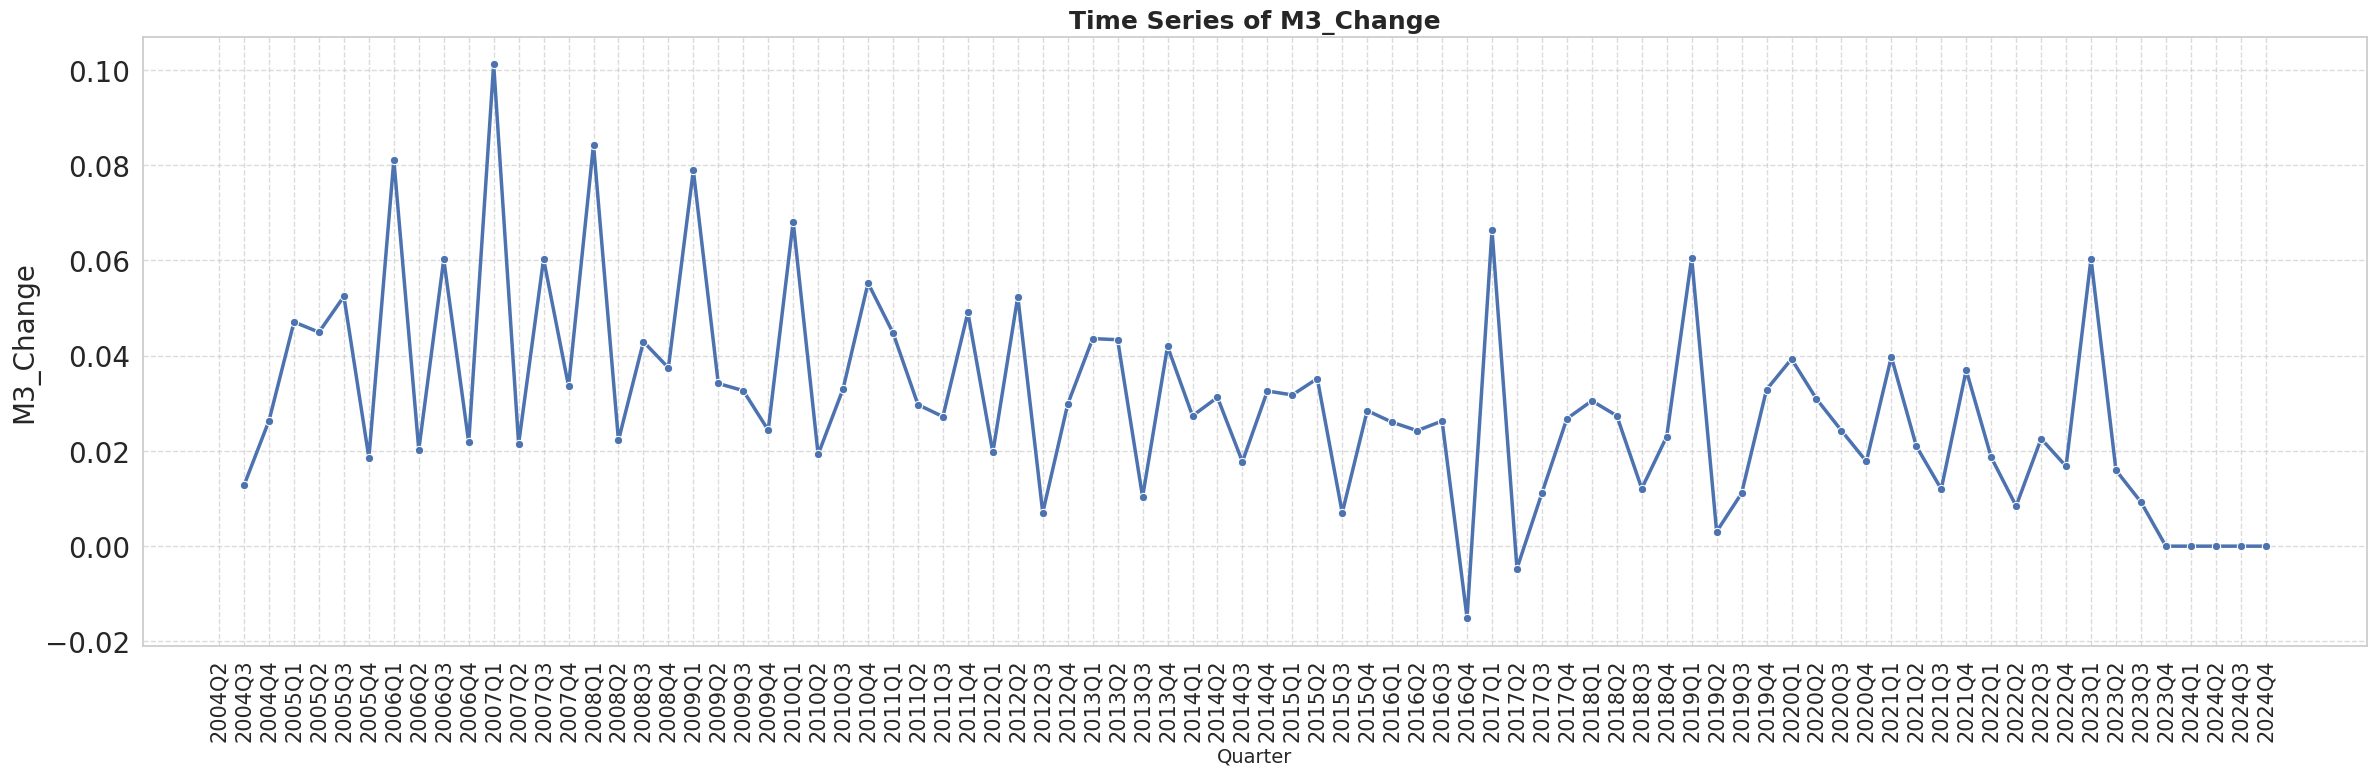

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


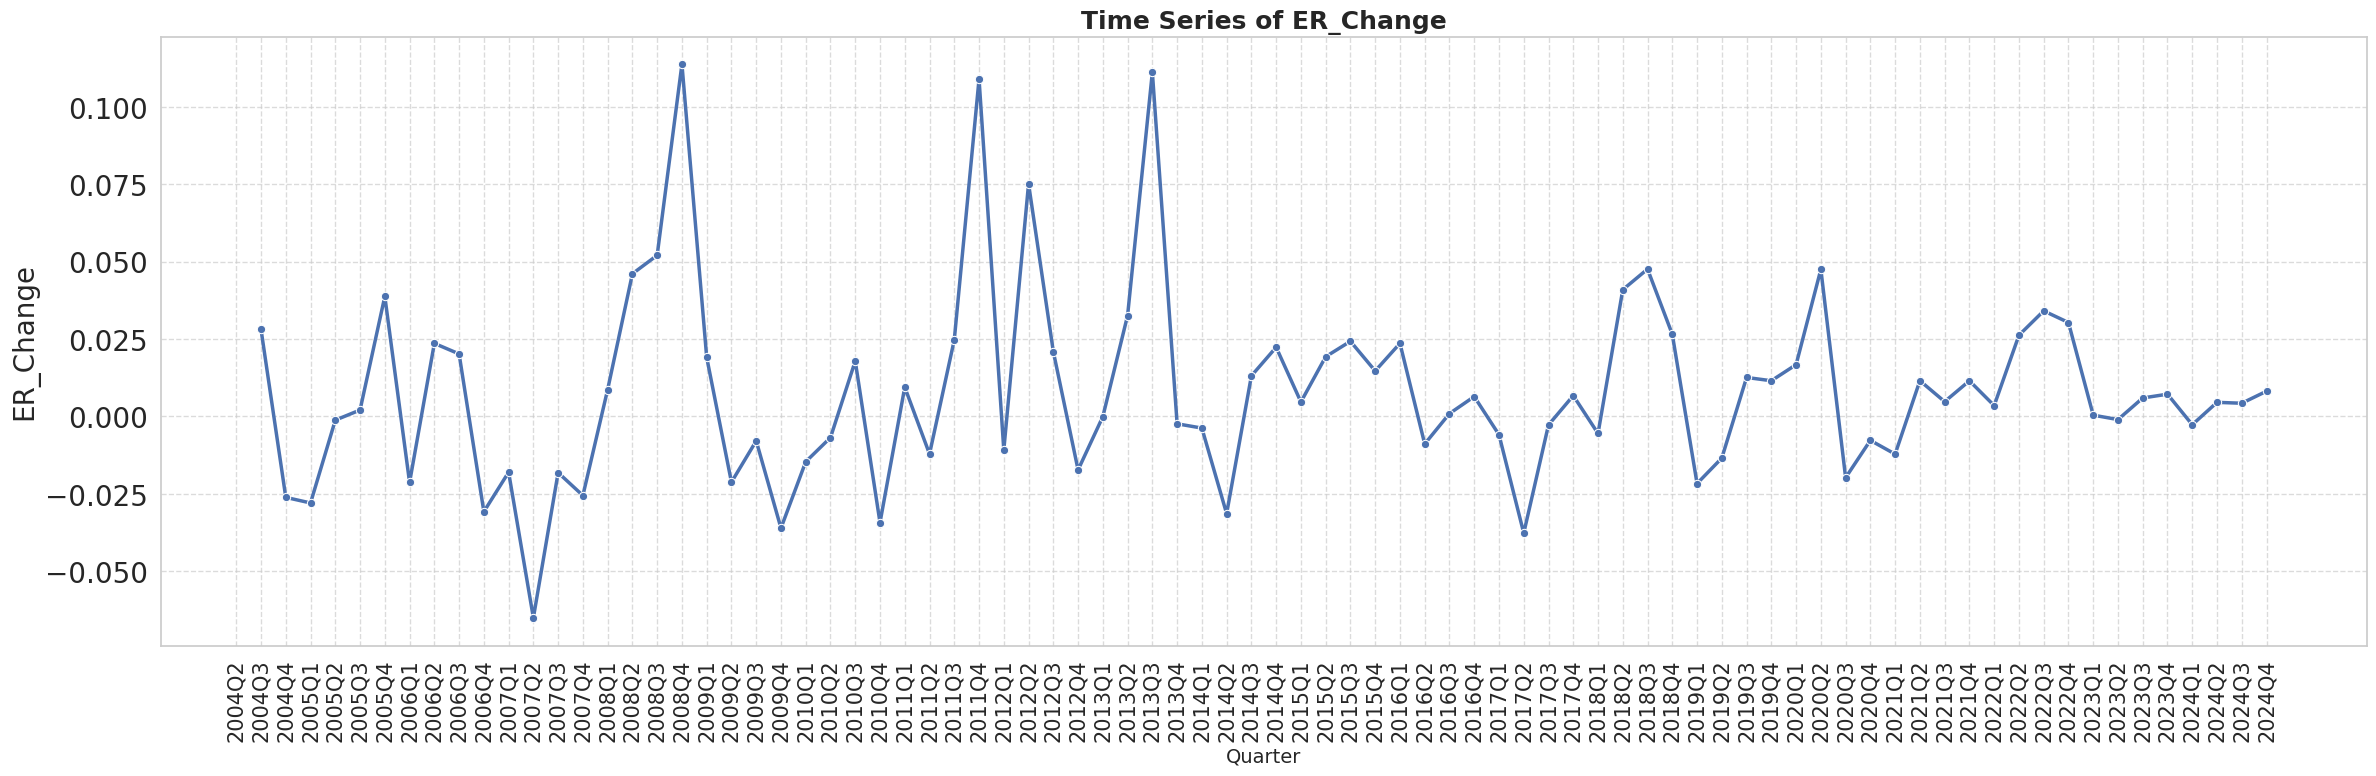

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


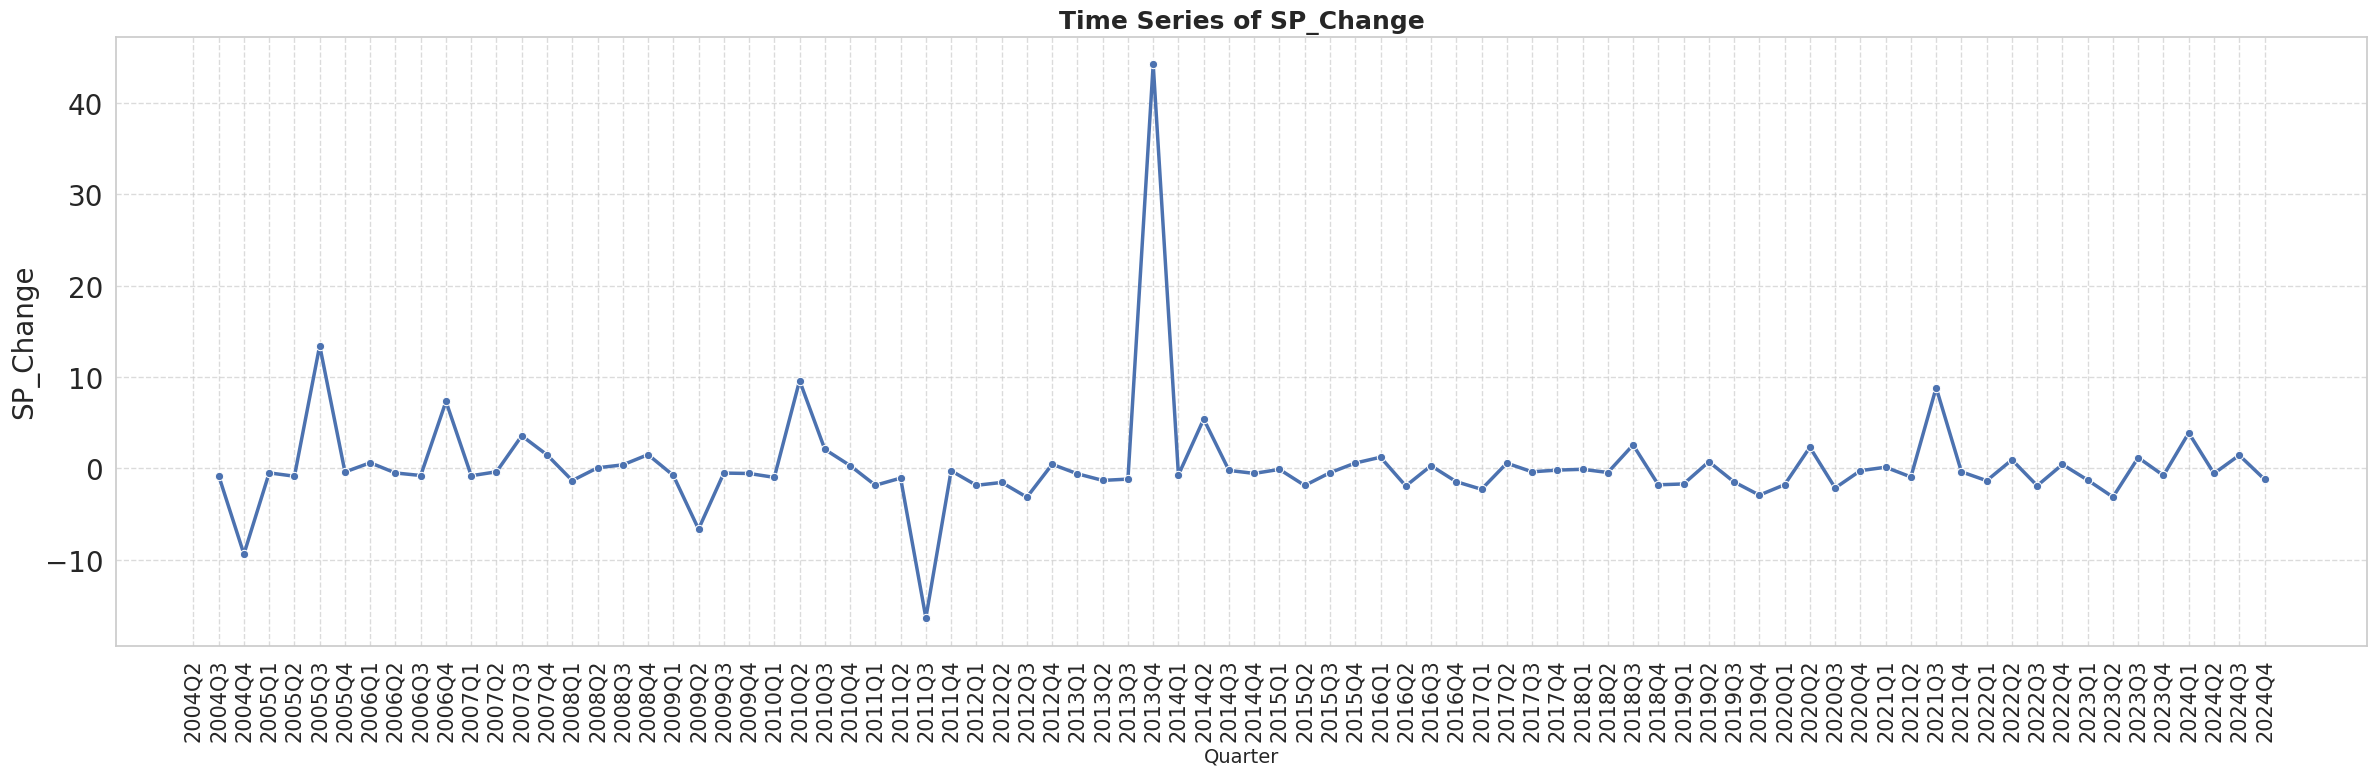

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


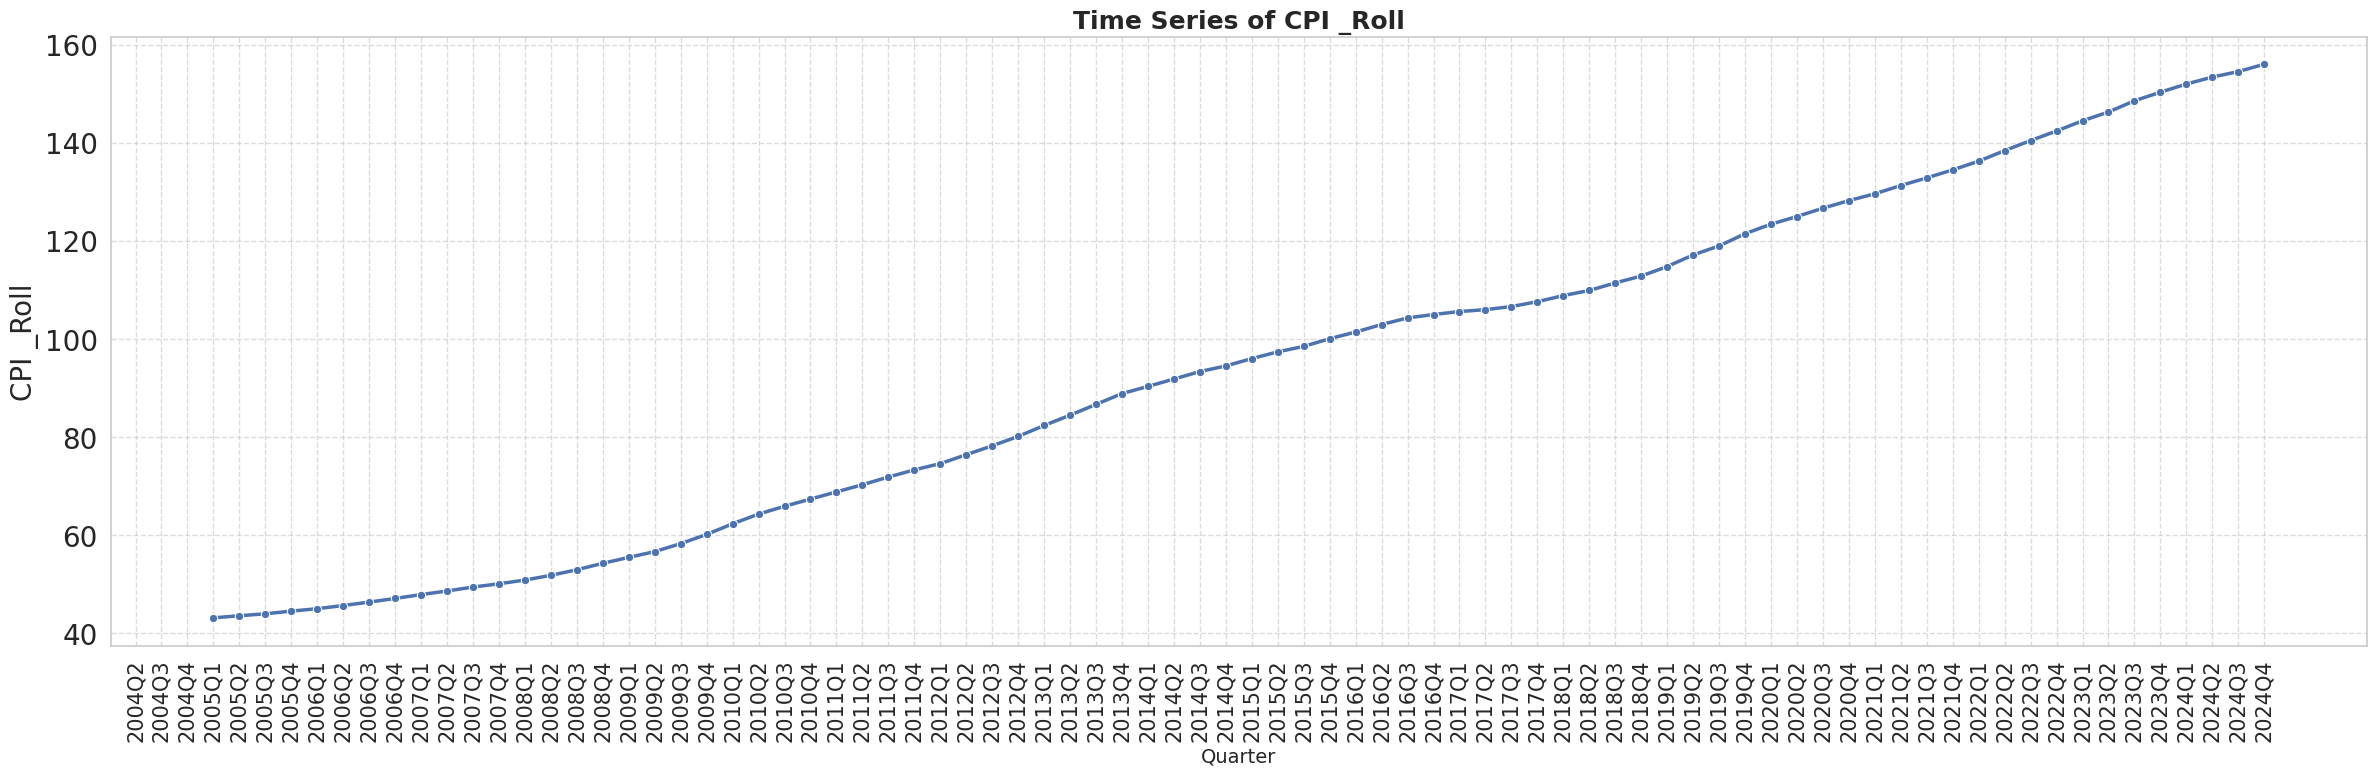

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


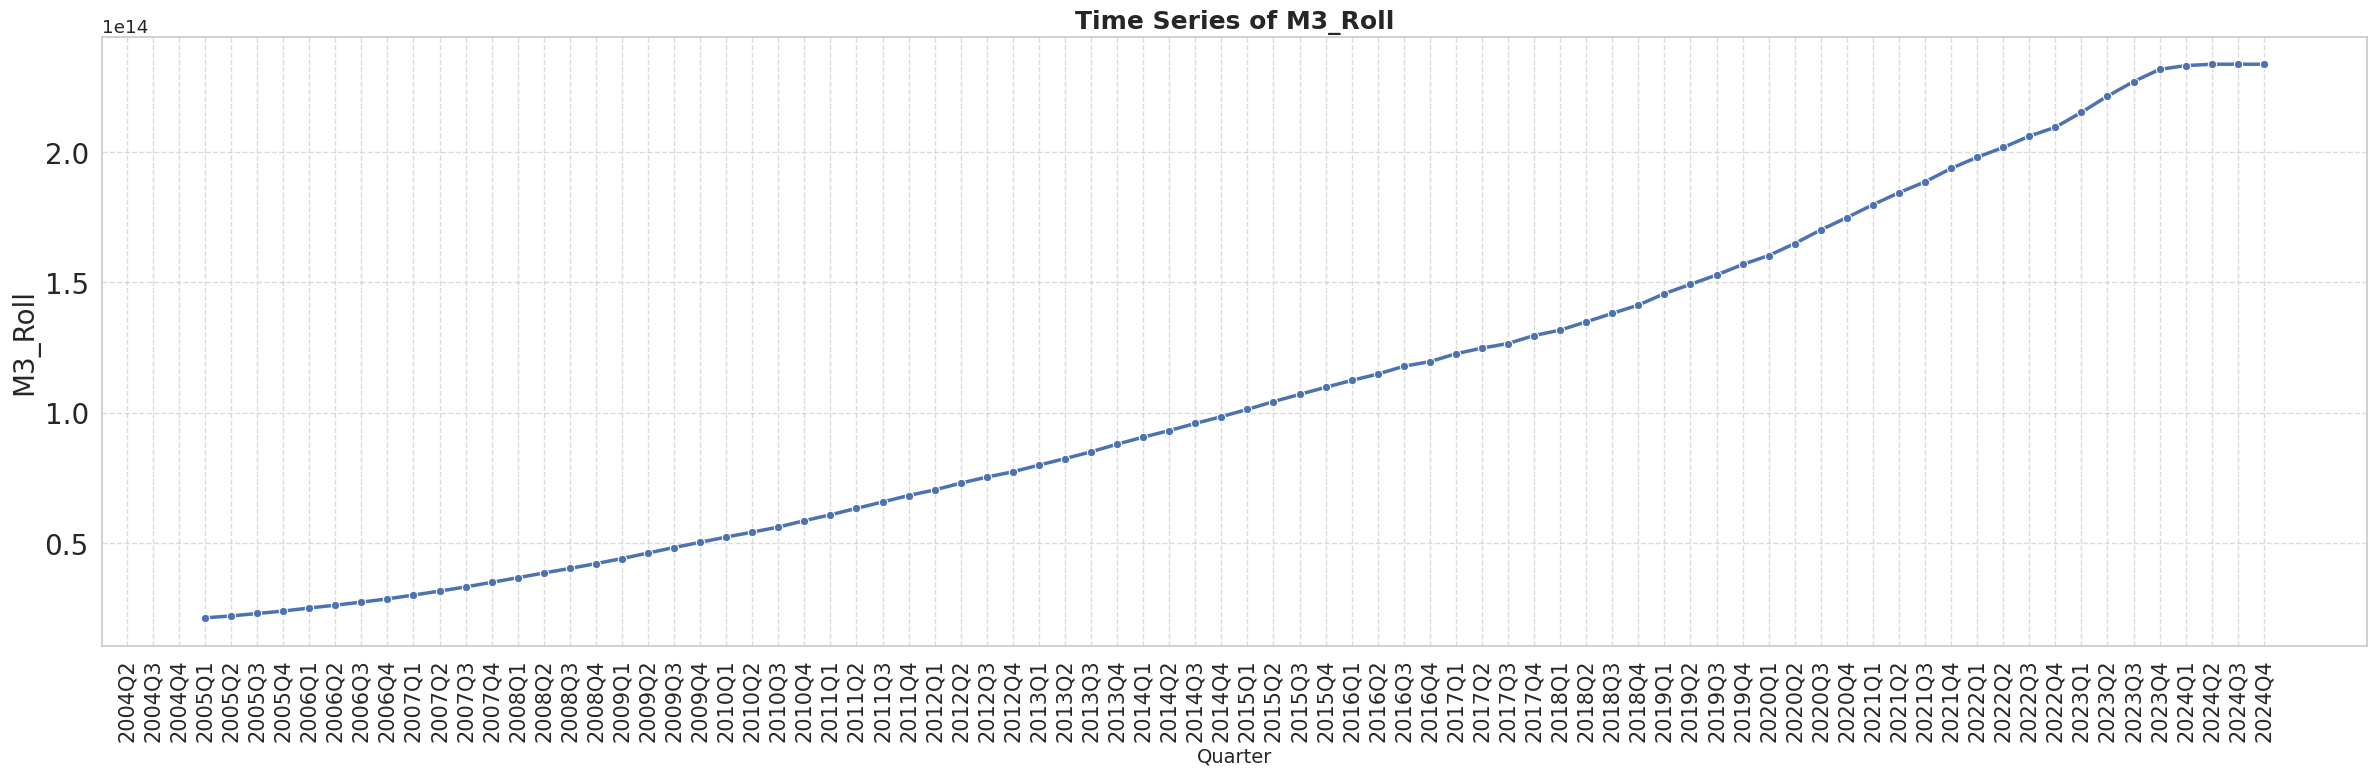

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


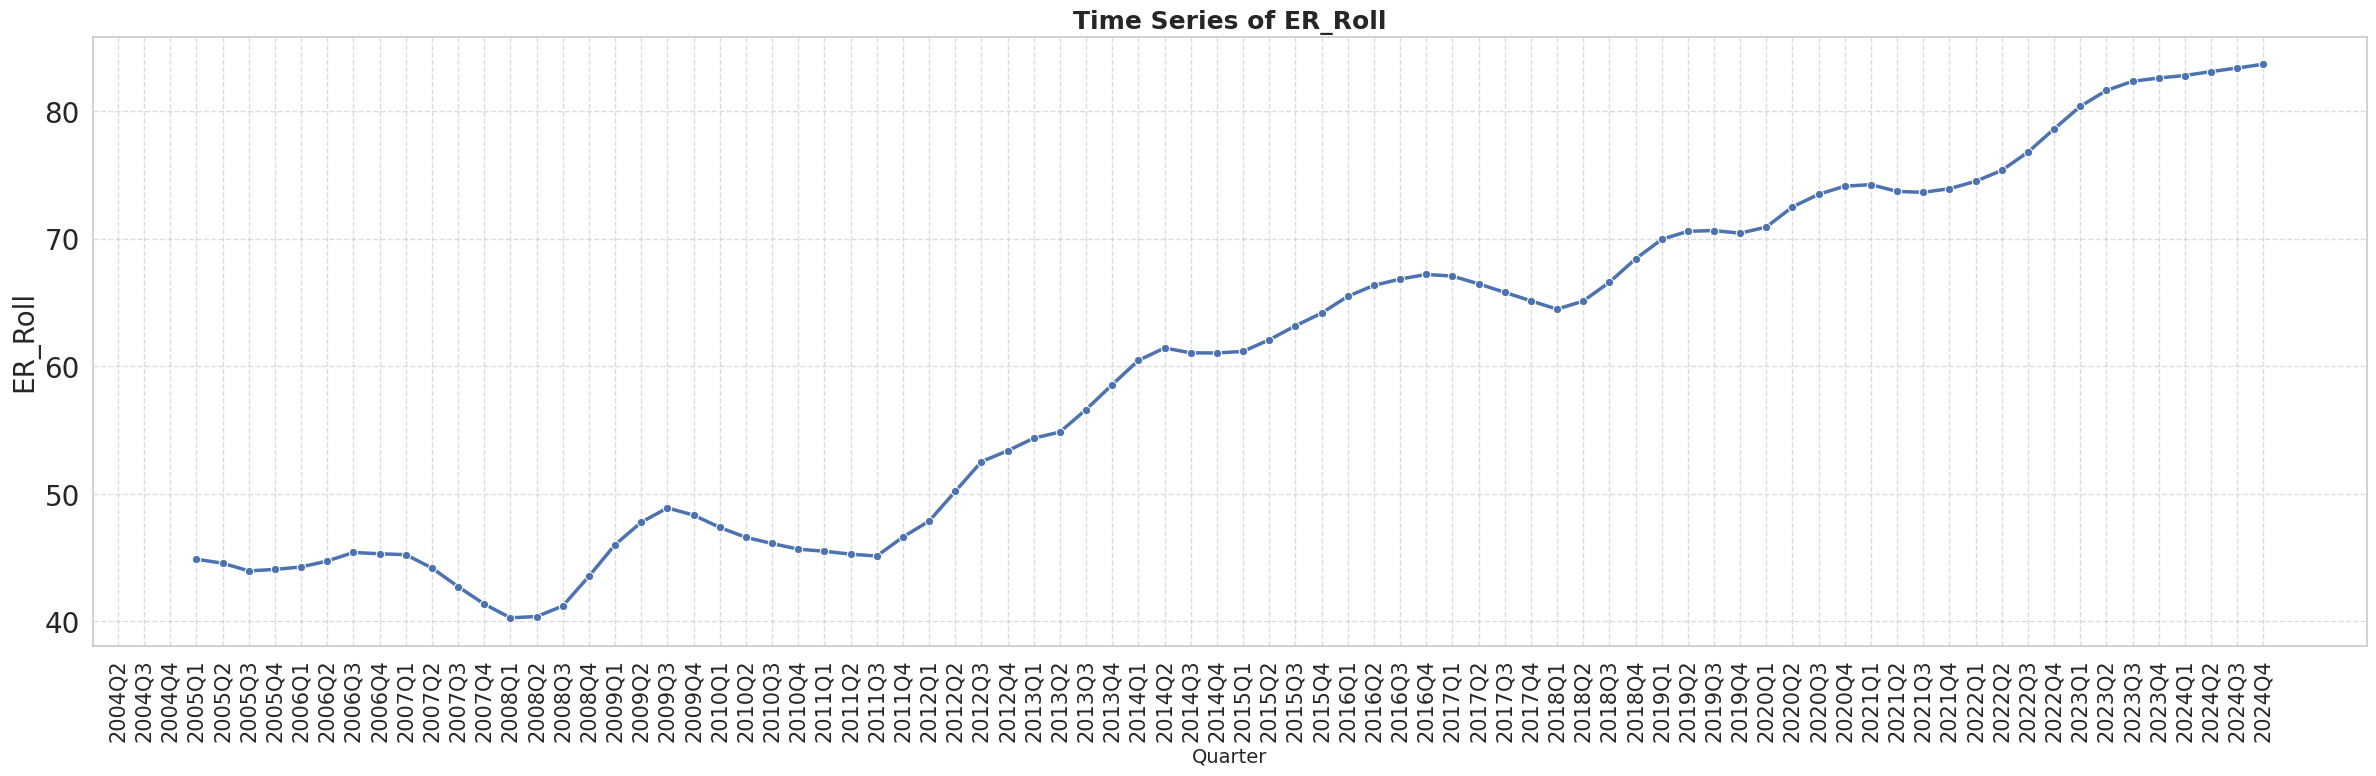

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


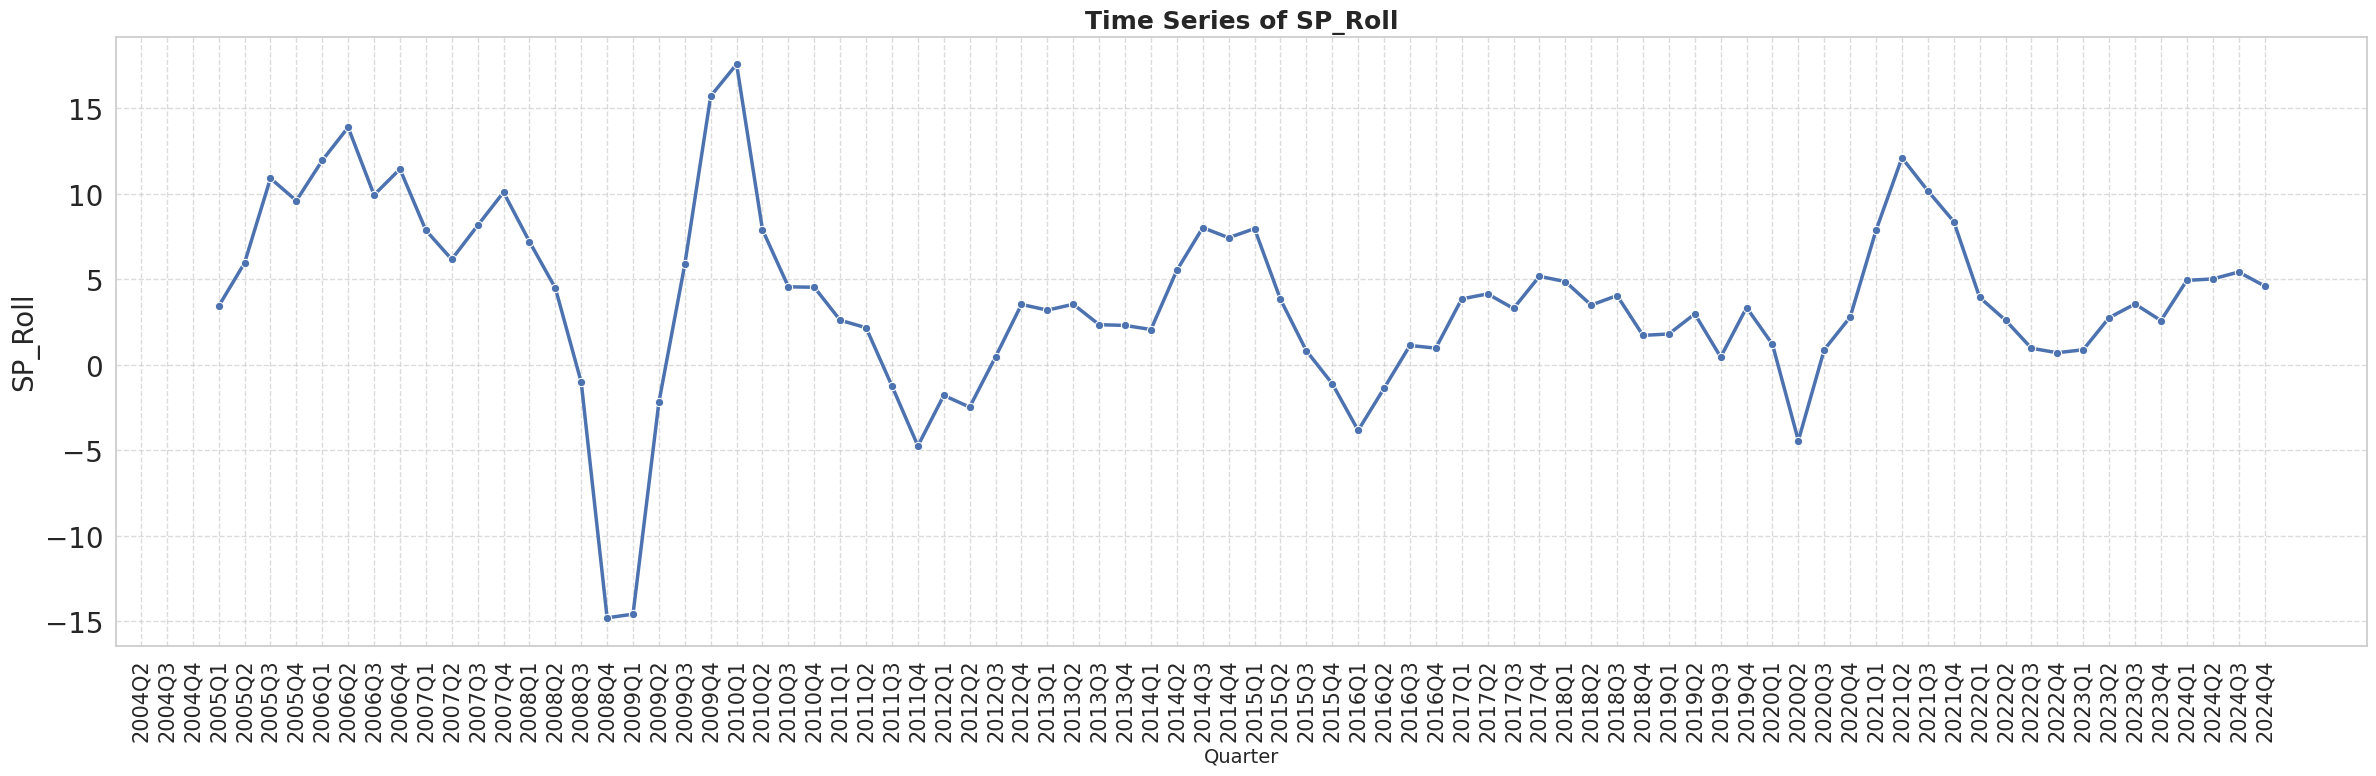

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


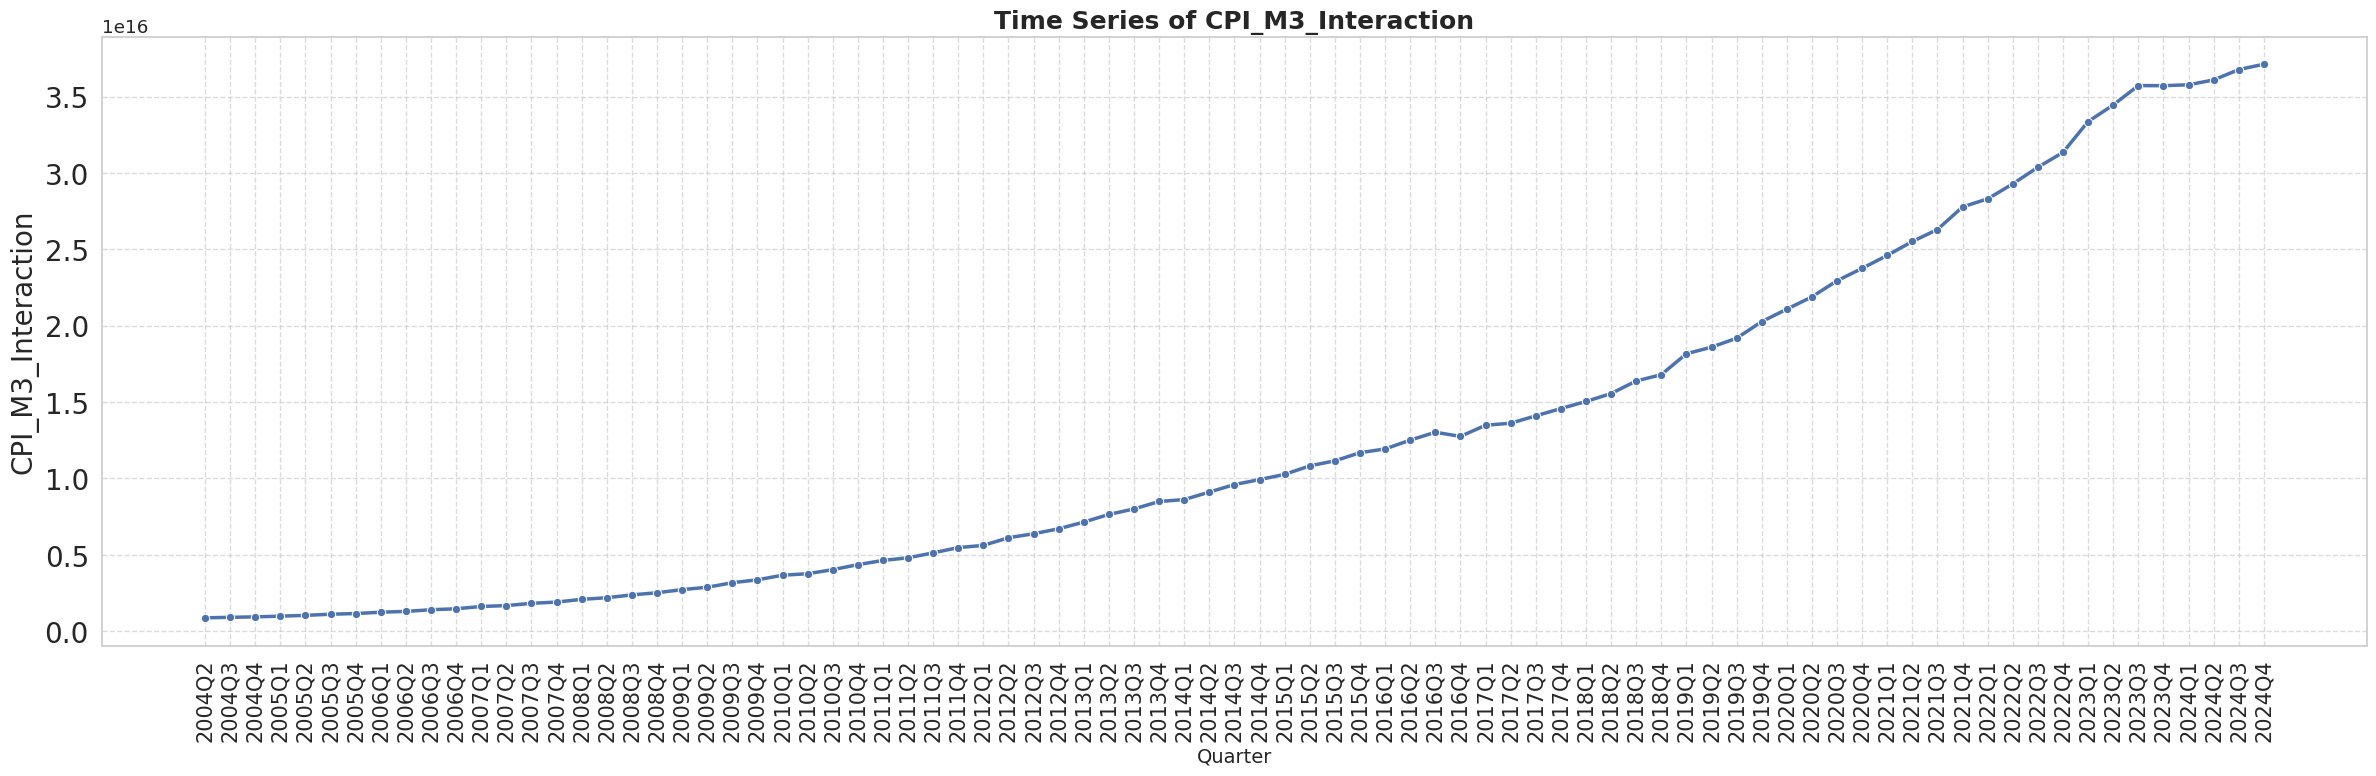

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


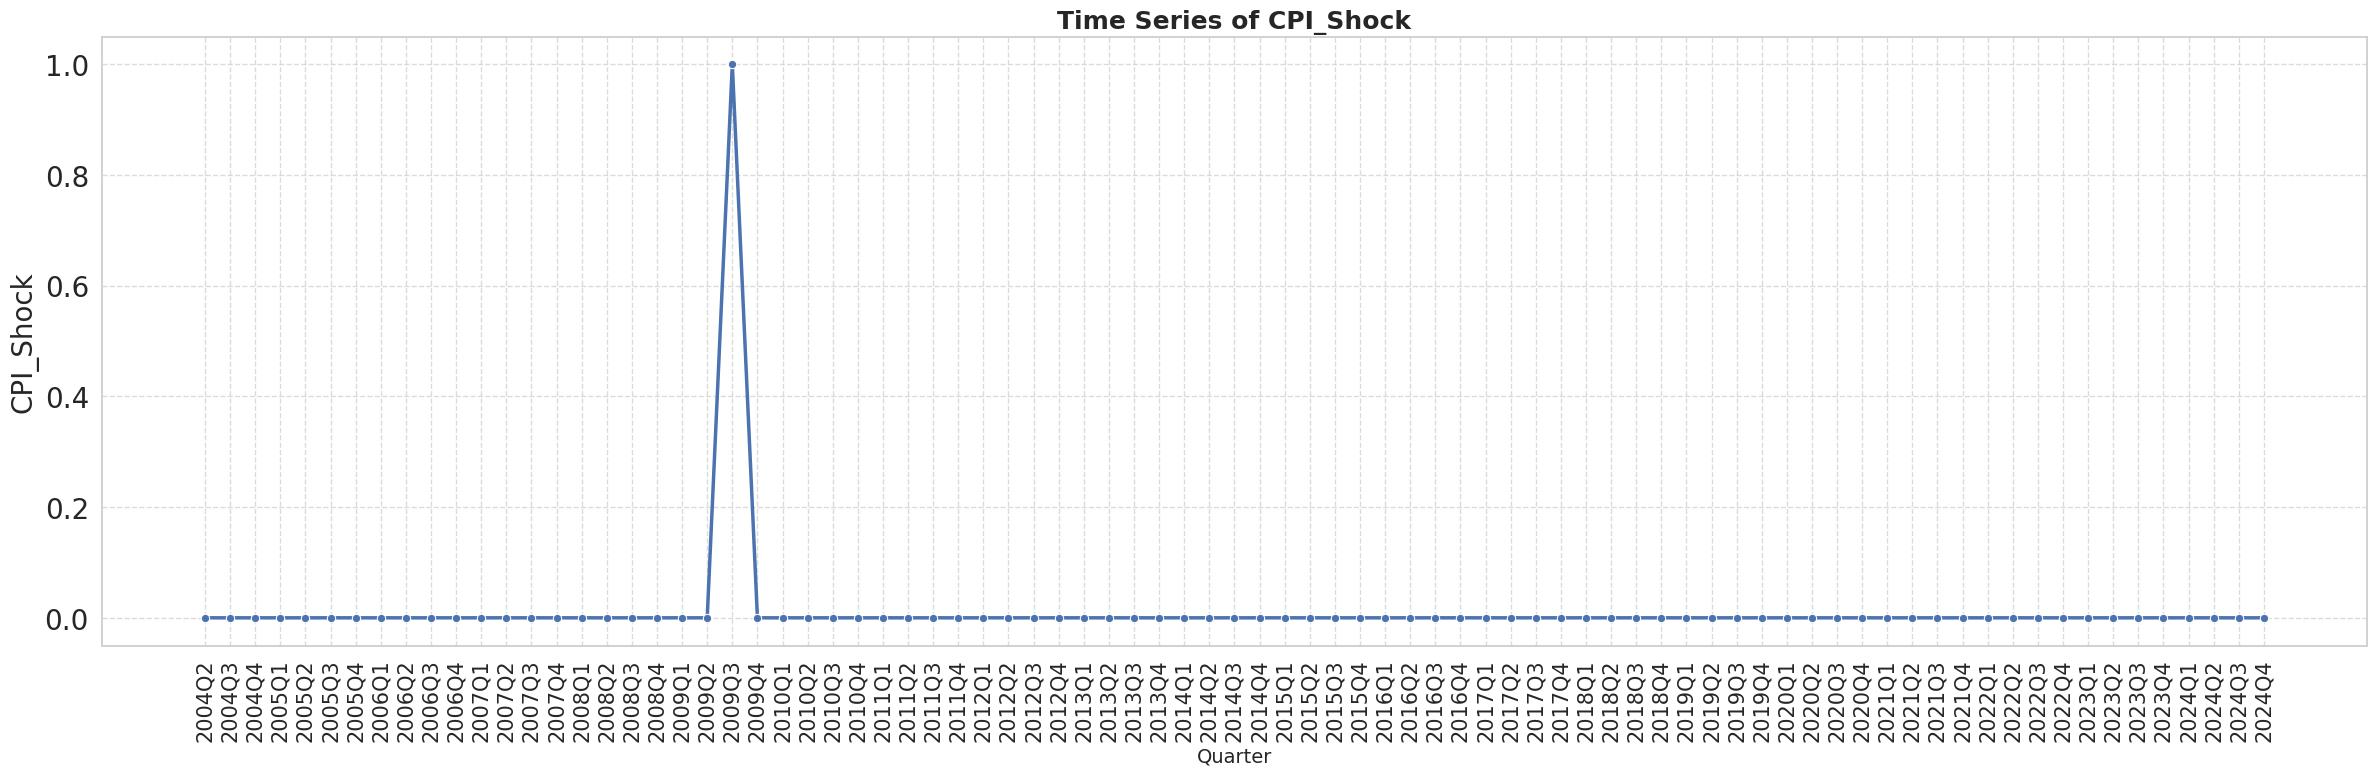

In [54]:
sns.set_theme(style="whitegrid", font_scale=1.2)

# List of New Engineered Features
new_features = [ 'CPI _Lag', 'M3_Lag', 'ER_Lag', 'SP_Lag', 'REPO_Lag',
                'CPI _Change', 'M3_Change', 'ER_Change', 'SP_Change',
                'CPI _Roll', 'M3_Roll', 'ER_Roll', 'SP_Roll',
                'CPI_M3_Interaction', 'CPI_Shock']

colors = sns.color_palette("Set2", len(features))

# Plot each new feature over 'Quarter'
for feature in new_features:
    plt.figure(figsize=(24,8))
    sns.lineplot(x='Quarter', y=feature, data=df, marker='o', linewidth=2.5)
    plt.title(f'Time Series of {feature}', fontsize=18, fontweight='bold')
    plt.xlabel('Quarter', fontsize=14)
    plt.ylabel(f'{feature}', fontsize=20)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [65]:
# Target variable
target = 'GDP'

# Remove columns not used as features
drop_cols = ['Quarter', 'GDP']  # Quarter = categorical time, GDP = target itself

feature_cols = df.columns.drop(drop_cols)

# Features and Target
X = df[feature_cols]
y = df[target]

print("Feature columns:", list(feature_cols))
print("X shape:", X.shape)
print("y shape:", y.shape)

Feature columns: ['CPI ', 'M3', 'XI RATIO', 'ER', 'PROD', 'INT', 'SP', 'WUI', 'GFCF', 'EP', 'WP', 'CAB', 'REIR', 'WGDP', 'REPO', 'UR', 'CPI _Lag', 'M3_Lag', 'ER_Lag', 'SP_Lag', 'REPO_Lag', 'CPI _Change', 'M3_Change', 'ER_Change', 'SP_Change', 'CPI _Roll', 'M3_Roll', 'ER_Roll', 'SP_Roll', 'CPI_M3_Interaction', 'CPI_Shock']
X shape: (83, 31)
y shape: (83,)


In [67]:
# Ensure time-order sorting
df = df.sort_values('Quarter')

# Split 80% Train, 20% Test — preserving time order
split_point = int(len(df) * 0.8)

X_train = X.iloc[:split_point]
X_test  = X.iloc[split_point:]

y_train = y.iloc[:split_point]
y_test  = y.iloc[split_point:]

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (66, 31)
Test set shape: (14, 31)


In [68]:
# Remove leading NaNs caused by rolling/lags/changes
X = X.dropna()
y = y.loc[X.index]  # Ensure y matches X rows

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Shape after NaN removal - X:", X.shape, " y:", y.shape)

Shape after NaN removal - X: (80, 31)  y: (80,)


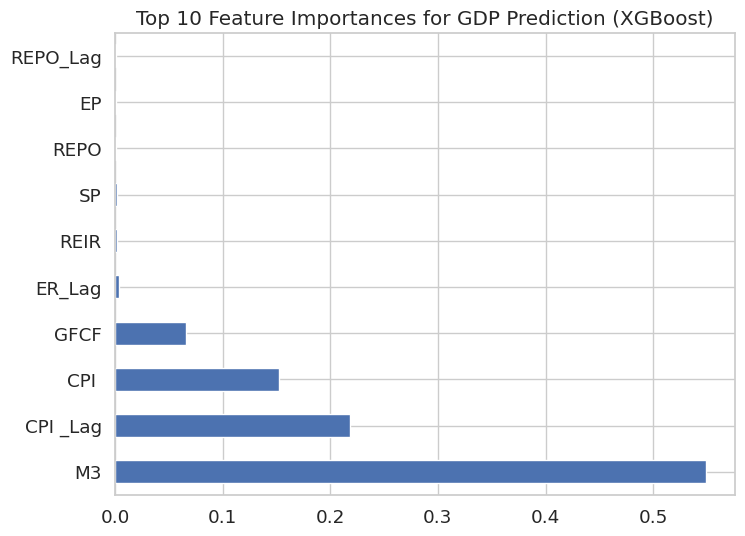

In [69]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model = XGBRegressor(n_estimators=31, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = pd.Series(importances, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Feature Importances for GDP Prediction (XGBoost)")
plt.show()

Top 25 Selected Features:
 ['CPI ', 'M3', 'XI RATIO', 'ER', 'WUI', 'GFCF', 'EP', 'WP', 'REIR', 'WGDP', 'REPO', 'UR', 'CPI _Lag', 'M3_Lag', 'ER_Lag', 'SP_Lag', 'REPO_Lag', 'CPI _Change', 'M3_Change', 'CPI _Roll', 'M3_Roll', 'ER_Roll', 'SP_Roll', 'CPI_M3_Interaction', 'CPI_Shock']

Linear Regression Model Performance (Top 25 Features):

               Model  R2 Score          RMSE           MAE
0  Linear Regression  0.774471  1.789123e+06  1.235783e+06


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


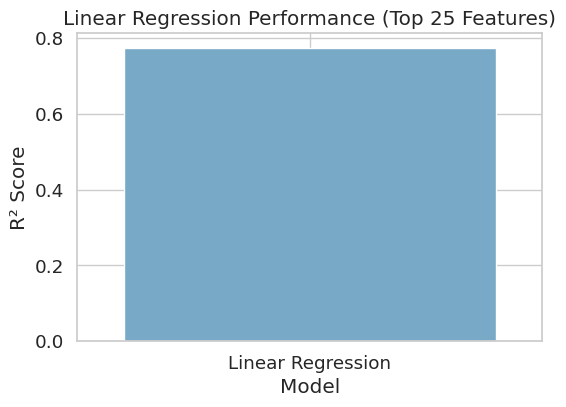

In [90]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Handle missing data before splitting (in case not done)
X = X.dropna()
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Feature Selection
k = 25  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# Get top k feature names
mask = selector.get_support()
selected_features = X.columns[mask]
print(f"Top {k} Selected Features:\n", list(selected_features))

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train_new, y_train)

# Predict on test data
y_pred = model.predict(X_test_new)

# Evaluate Model Performance
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Store results
results = {'Model': ['Linear Regression'],
           'R2 Score': [r2],
           'RMSE': [rmse],
           'MAE': [mae]}

results_df = pd.DataFrame(results)
print("\nLinear Regression Model Performance (Top", k, "Features):\n")
print(results_df)

# Optional: Bar plot of R2 Score
plt.figure(figsize=(6,4))
sns.barplot(data=results_df, x='Model', y='R2 Score', palette='Blues')
plt.title(f'Linear Regression Performance (Top {k} Features)')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()



In [91]:
# Get the last available data point
last_quarter = X.iloc[[-1]]  # last row as DataFrame

# Show original CPI value
original_cpi = last_quarter['CPI '].values[0]
print(f"Original CPI: {original_cpi}")

# Simulate CPI +10% Shock
shock_quarter = last_quarter.copy()
shock_quarter['CPI '] = original_cpi * 1.10  # CPI increased by 10%

# Select only the top K features (as per model)
last_quarter_selected = selector.transform(last_quarter)
shock_quarter_selected = selector.transform(shock_quarter)

# Predict GDP without shock
original_prediction = model.predict(last_quarter_selected)[0]

# Predict GDP with CPI shock
shock_prediction = model.predict(shock_quarter_selected)[0]

print(f"\nOriginal Predicted GDP: {original_prediction:.2f}")
print(f"Predicted GDP after +10% CPI Shock: {shock_prediction:.2f}")
print(f"Difference due to CPI Shock: {shock_prediction - original_prediction:.2f}")


Original CPI: 158.9105

Original Predicted GDP: 43726378.19
Predicted GDP after +10% CPI Shock: 43975862.53
Difference due to CPI Shock: 249484.34
